## Trabajo Fin de Máster - Universidad Alfonso X El Sabio 

### Análisis predictivo del éxito comercial de videojuegos mediante técnicas de aprendizaje automático 

### Máster Universitario en Análisis de Datos Masivos (Big Data) para los Negocios - Víctor Sánchez Revuelta 

El siguiente algoritmo utiliza técnicas de aprendizaje automático para entrenar diferentes modelos de machine learning haciendo uso de una cierta cantidad de datos sobre videojuegos obtenidos de la API RAWG (https://rawg.io/) con el objetivo de estimar el éxito de un videojuego en base a ciertas variables que representan distintas características del mismo (género, plataformas, fecha de lanzamiento, etc.). A continuación se explica el proceso de carga y transformación de datos, así como el entrenamiento de diversos modelos para así poder obtener un buen resultado y cumplir el objetivo deseado: 

Primeramente se importan las librerías principales y se establecen ciertas opciones que serán útiles para visualizar los datos: 

In [321]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing as prep
import warnings
from pandas.errors import SettingWithCopyWarning
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#pd.set_option('display.max_colwidth', None)

# Suprimir el SettingWithCopyWarning
#warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)
warnings.filterwarnings('ignore')

Se leen y se cargan los CSVs que contienen los datos: 

In [322]:
data = pd.DataFrame()
for i in range(1, 46): 
    ruta_csv = 'C:/Users/Bluetab/Desktop/TFM/videogames_data/games' + str(i) + '.csv'
    data = pd.concat([data, pd.read_csv(ruta_csv , sep = '|', low_memory=False)]) 
    print("csv", i, "cargado")
print("Dataframes cargados:", i)
print("Registros cargados:", len(data) - 1)

csv 1 cargado
csv 2 cargado
csv 3 cargado
csv 4 cargado
csv 5 cargado
csv 6 cargado
csv 7 cargado
csv 8 cargado
csv 9 cargado
csv 10 cargado
csv 11 cargado
csv 12 cargado
csv 13 cargado
csv 14 cargado
csv 15 cargado
csv 16 cargado
csv 17 cargado
csv 18 cargado
csv 19 cargado
csv 20 cargado
csv 21 cargado
csv 22 cargado
csv 23 cargado
csv 24 cargado
csv 25 cargado
csv 26 cargado
csv 27 cargado
csv 28 cargado
csv 29 cargado
csv 30 cargado
csv 31 cargado
csv 32 cargado
csv 33 cargado
csv 34 cargado
csv 35 cargado
csv 36 cargado
csv 37 cargado
csv 38 cargado
csv 39 cargado
csv 40 cargado
csv 41 cargado
csv 42 cargado
csv 43 cargado
csv 44 cargado
csv 45 cargado
Dataframes cargados: 45
Registros cargados: 882274


Se eliminan duplicados y se visualiza un ejemplo del dataframe cargado: 

In [323]:
data.drop_duplicates(inplace=True)
data[data['game_ratings_title'].notna()].sample(3)

,id,slug,released,tba,background_image,rating,rating_top,game_ratings_title,game_ratings_count,game_ratings_percent,reviews_text_count,added,added_by_status_title,added_by_status_values,metacritic,playtime,suggestions_count,reviews_count,esrb_rating_id,esrb_rating_name,esrb_rating_slug,platforms,platforms_games_count,platforms_image_background,released_at,parent_platforms,genres,stores,stores_games_count,stores_image_background,tags,tags_language,tags_games_count
11574,16455,nyxquest-kindred-spirits,2009-08-10,False,https://media.rawg.io/media/screenshots/348/348f5189a5b260e1c1c42d1c0311ca1e.jpg,2.9,3,"meh,recommended,skip","5,3,2","50,30,20",1,143,"yet,owned,beaten,toplay,dropped","7,125,4,2,5",NaN,1,345,10,NaN,NaN,NaN,"wii,pc,macos","2230,531864,104197","https://media.rawg.io/media/games/dd7/dd72d8a527cd9245c7eb7cd05aa53efa.jpg,https://media.rawg.io/media/games/d82/d82990b9c67ba0d2d09d4e6fa88885a7.jpg,https://media.rawg.io/media/games/49c/49c3dfa4ce2f6f140cc4825868e858cb.jpg","2009-08-10,2010-09-26,2010-09-27","pc,mac,nintendo","action,adventure","gog,steam,nintendo","6165,94959,9029","https://media.rawg.io/media/games/d1a/d1a2e99ade53494c6330a0ed945fe823.jpg,https://media.rawg.io/media/games/736/73619bd336c894d6941d926bfd563946.jpg,https://media.rawg.io/media/games/f46/f466571d536f2e3ea9e815ad17177501.jpg","singleplayer,steam-achievements,female-protagonist,mythology","eng,eng,eng,eng","223846,38071,12456,1993"
994,21038,super-dungeon-run,2015-07-17,False,https://media.rawg.io/media/screenshots/bce/bced9169c50b447368212fabce3f4e72.jpg,0.0,0,meh,2,100,0,46,"yet,owned","1,45",NaN,2,409,2,NaN,NaN,NaN,"pc,linux,macos","531864,77126,104197","https://media.rawg.io/media/games/d82/d82990b9c67ba0d2d09d4e6fa88885a7.jpg,https://media.rawg.io/media/games/48c/48cb04ca483be865e3a83119c94e6097.jpg,https://media.rawg.io/media/games/49c/49c3dfa4ce2f6f140cc4825868e858cb.jpg","2015-07-17,2015-07-17,2015-07-17","pc,mac,linux","action,adventure,role-playing-games-rpg,indie",steam,94959,https://media.rawg.io/media/games/736/73619bd336c894d6941d926bfd563946.jpg,"singleplayer,steam-cloud,rpg,early-access","eng,eng,eng,eng","223846,18040,21086,15309"
19301,56560,i-ball,1987-01-01,False,https://media.rawg.io/media/screenshots/b32/b3221603801cc295368944e91680a203.jpg,0.0,0,exceptional,1,100,0,9,"owned,beaten,toplay,dropped","5,1,2,1",NaN,0,204,1,NaN,NaN,NaN,"atari-st,commodore-amiga","836,2079","https://media.rawg.io/media/screenshots/127/127a986dd3867ca6c529377b07f57882.jpg,https://media.rawg.io/media/screenshots/9ae/9ae2ece52d0099180ad3a0b8a49c57a6.jpg","1987-01-01,1987-01-01","atari,commodore-amiga",action,NaN,NaN,NaN,singleplayer,eng,223846


Veamos la información de las columnas de estos datos (información proveniente del origen de datos https://rawg.io/): 

- **id**: ID único del videojuego en la base de datos de RAWG.
- **slug**: Nombre del videojuego en formato de texto. en minúsculas, sin signos de puntuación y con guiones en lugar de espacios.
- **released**: Fecha oficial de lanzamiento del videojuego.
- **tba**: Indicador de si la fecha de lanzamiento está por determinar o no ("to be announced").
- **background_image**: URL de la imagen del videojuego (como por ejemplo la imagen de portada).
- **rating**: Nota media del videojuego basada en las reseñas de los usuarios.
- **rating_top**: Máxima nota que un videojuego ha obtenido por un usuario.
- **game_ratings_title**: Lista de nombres de las etiquetas asociadas a las calificaciones que ha obtenido el videojuego (los valores son: "exceptional", "recommended", "meh" y "skip" en orden de mejor a peor calificación).
- **game_ratings_count**: Cantidad de veces con los que el videojuego se ha calificado con las etiquetas mostradas en la variable anterior "game_ratings_title" (en el mismo orden en el que aparecen en dicha variable).
- **game_ratings_percent**: Porcentaje de cada etiqueta sobre el total mostradas en la variable anterior "game_ratings_count" (en el mismo orden en el que aparecen en dicha variable).
- **reviews_text_count**: Número de reseñas que han sido escritas sobre el videojuego por los usuarios.
- **added**: Número de usuarios que han agregado el videojuego a su lista de videojuegos (pueden añadirlo a su lista por cualquier motivo: por tenerlo en posesión, por no tenerlo y querer comprarlo, por haberlo empezado pero no acabado, etc.).
- **added_by_status_title**: Lista de títulos de los diferentes estados en los que los usuarios han clasificado el videojuego en su lista de videojuegos añadidos (los valores son: "beaten" (el usuario ha completo ese videojuego), "dropped" (el usuario ha empezado a jugar a ese videojuego pero ha decido de jar de jugar antes de completarlo), "owned" (el usuario ha obtenido ese videojuego, independientemente si lo ha empezado a jugar o no), "playing" (el usuario está jugando actualmente a ese videojuego), "toplay" (el usuario posee dicho videojuego pero no lo ha empezado y tiene la intención de jugarlo en un futuro) y "yet" (similar a "toplay" pero esta vez el usuario no posee dicho videojuego y tiene la intención de jugarlo en un futuro)).
- **added_by_status_values**: Número de usuarios correspondientes a los nombres de las etiquetas mostradas en la variable anterior "added_by_status_title" (en el mismo orden en el que aparecen en dicha variable).
- **metacritic**: Nota del videojuego en la web Metacritic, una web en la que usuarios pueden puntuar videojuegos.
- **playtime**: Tiempo promedio en horas que los usuarios dedican a dicho videojuego.
- **suggestions_count**: Número de sugerencias de dicho videojuego basadas en su relación con otros videojuegos (se puede traducir como el número de videjuegos con los que dicho videojuego se puede identificar).
- **reviews_count**: Número total de reseñas (calificaciones y reseñas escritas) sobre dicho videojuego.
- **esrb_rating_id**: Lista de IDs numéricos de la clasificación ESRB del videojuego (ESRB = Entertainment Software Rating Board, una clasificación por edades que indica la edad recomendada para jugar a un videojuego) (los valores son: "1" (everyone), "2" (everyone-10-plus), "3" (teen), "4" (mature), "5" (adults-only) y "6" (rating-pending)).
- **esrb_rating_name**: Nombre de las clasificaciones ESRB mostradas en la variable anterior "esrb_rating_id" (los valores son: "everyone", "everyone-10-plus", "teen", "mature", "adults-only" y "rating-pending") (en el mismo orden en el que aparecen en dicha variable).
- **esrb_rating_slug**: Contiene los mismos valores que la variable anterior "esrb_rating_name pero en minúsculas, sin signos de puntuación y con guiones en lugar de espacios.
- **platforms**: Lista de plataformas en las que el videojuego está disponible (los valores son: "3do", "android", "apple-ii", "atari-2600", "atari-5200", "atari-7800", "atari-8-bit", "atari-flashback", "atari-lynx", "atari-st", "atari-xegs", "commodore-amiga", "dreamcast", "game-boy", "game-boy-advance", "game-boy-color", "game-gear", "gamecube", "genesis", "ios", "jaguar", "linux", "macintosh", "macos", "neogeo", "nes", "nintendo-3ds", "nintendo-64", "nintendo-ds", "nintendo-dsi", "nintendo-switch", "pc", "playstation1", "playstation2", "playstation3", "playstation4", "playstation5", "ps-vita", "psp", "sega-32x", "sega-cd", "sega-master-system", "sega-saturn", "snes", "web", "wii", "wii-u", "xbox-old", "xbox-one", "xbox-series-x" y "xbox360").
- **platforms_games_count**: Cantidad total que los usuarios han indicado como que han jugado o poseen ese videojuego en cada plataforma listada en la variable anterior "platforms" (en el mismo orden en el que aparecen en dicha variable).
- **platforms_image_background**: URs de las imágenes del videojuego relacionadas con las plataformas listadas en la variable "platforms" (en el mismo orden en el que aparecen en dicha variable).
- **released_at**: Fecha de lanzamiento para cada plataforma indicada en la variable "platforms" (en el mismo orden en el que aparecen en dicha variable).
- **parent_platforms**: Lista de marcas principales de las plataformas en las que está disponible ese videojuego (los valores son: "3do", "android", "atari", "commodore-amiga", "ios", "linux", "mac", "neo-geo", "nintendo", "pc", "playstation", "sega", "web" y "xbox_parent").
- **genres**: Lista de géneros a los que pertenece el videojuego (los valores son: "action", "adventure", "arcade", "board-games", "card", "casual", "educational", "family", "fighting", "indie", "massively-multiplayer", "platformer", "puzzle", "racing", "role-playing-games-rpg", "shooter", "simulation", "sports" y "strategy").
- **stores**: Lista de tiendas donde el juego está disponible para su compra o descarga (los valores son: apple-appstore", "epic-games", "gog", "google-play", "itch", "nintendo", "playstation-store", "steam", "xbox-store" y "xbox360").
- **stores_games_count**: Cantidad total que los usuarios han indicado que han adquirido el videojuego en las tiendas indicadas en la variable anterior "stores" (en el mismo orden en el que aparecen en dicha variable).
- **stores_image_background**: URLs de las imágenes del videojuego relacionadas con las tiendas listadas en la variable "stores" (en el mismo orden en el que aparecen en dicha variable).
- **tags**: Lista de etiquetas o "tags" con las que los usuarios han categorizado al videojuego (como "Singleplayer", "Multiplayer", etc.).
- **tags_language**: Idioma en el que se muestran las etiquetas indicadas en la variable anterior "tags" (en el mismo orden en el que aparecen en dicha variable).
- **tags_games_count**: Cantidad total de veces que los usuarios han etiquetado al videjuego con cada categoría indicada en la variable "tags" (en el mismo orden en el que aparecen en dicha variable).

Se eliminan las columnas que no aportan información a primera vista y se filtra por "tba" = false para obtener la lista de videojuegos que ya están en el mercado: 

In [324]:
data_dropped = data.drop(["platforms_games_count", "background_image", "rating_top", "esrb_rating_name", "platforms_image_background", "stores_image_background"], axis = 1).drop_duplicates()

#FFiltro por tba (to be announce) = False 
data_filter_tba_false = data_dropped[~data_dropped["tba"]].drop(["tba"], axis = 1) 

Se eliminan los registros que no tienen 'slug' ni fecha de lanzamiento 'released', ya que se han considerado como variables muy importantes en nuestro análisis: 

In [325]:
date_columns_dates_slug_released = ['slug', 'released'] 
for col in date_columns_dates_slug_released:
    data_filter_tba_false.dropna(subset=[col], inplace=True)

A continuación se crea una columna por cada valor de la variable "game_ratings_title" y se indica en cada una de ellas su valor correspondiente indicada en la variable "game_ratings_count". También se crean las mismas columnas añadiendo el sufijo "_ percent" donde se indica en cada una de ellas su valor correspondiente indicada en la variable "game_ratings_percent". Se imprime por pantalla los diferentes valores encontrados en la variable "game_ratings_title" y el número de registros en los que la longitud de las listas en las 3 variables mencionadas no coinciden (debe salir 0 si los datos son correctos): 

In [326]:
data_filter_platforms = data_filter_tba_false 

# 1. Separamos los valores en listas
data_filter_platforms['game_ratings_title'] = data_filter_platforms['game_ratings_title'].fillna('').astype(str).str.split(',')
data_filter_platforms['game_ratings_count'] = data_filter_platforms['game_ratings_count'].fillna('').astype(str).str.split(',')
data_filter_platforms['game_ratings_percent'] = data_filter_platforms['game_ratings_percent'].fillna('').astype(str).str.split(',')

def replace_empty_list(lst):
    if lst == ['']:
        return []
    return lst

data_filter_platforms['game_ratings_title'] = data_filter_platforms['game_ratings_title'].apply(replace_empty_list)
data_filter_platforms['game_ratings_count'] = data_filter_platforms['game_ratings_count'].apply(replace_empty_list)
data_filter_platforms['game_ratings_percent'] = data_filter_platforms['game_ratings_percent'].apply(replace_empty_list)

# Calcular la longitud de cada lista
data_filter_platforms['title_length'] = data_filter_platforms['game_ratings_title'].apply(lambda x: len(x))
data_filter_platforms['count_length'] = data_filter_platforms['game_ratings_count'].apply(lambda x: len(x))
data_filter_platforms['percent_length'] = data_filter_platforms['game_ratings_percent'].apply(lambda x: len(x))

# Filtrar registros donde las longitudes no coinciden
mismatch_df = (data_filter_platforms['title_length'] != data_filter_platforms['count_length']) | (data_filter_platforms['title_length'] != data_filter_platforms['percent_length'])

## 2. Creamos una lista de todas las categorías de ratings únicas
## Utilizamos un conjunto (set) para obtener todas las categorías sin duplicados
all_ratings = sorted(set(rating_title for sublist in data_filter_platforms['game_ratings_title'] for rating_title in sublist))
print(all_ratings)

## 3. Creamos un diccionario para almacenar las listas de conteos para cada categoría
rating_columns = {rating: [] for rating in all_ratings}
rating_columns.update({rating + '_percent': [] for rating in all_ratings})  # Añadir claves para porcentajes

# Función para convertir los valores a enteros
def convert_to_int(lst):
    return [int(float(x)) for x in lst]

# Aplicar la conversión a cada lista en la columna 'numbers'
data_filter_platforms['game_ratings_count'] = data_filter_platforms['game_ratings_count'].apply(convert_to_int)

# 4. Iteramos sobre cada fila en el DataFrame
for i, title in enumerate(data_filter_platforms['game_ratings_title']):
    # Obtenemos la lista de conteos correspondiente a la fila actual
    counts = data_filter_platforms['game_ratings_count'].iloc[i]
    percents = data_filter_platforms['game_ratings_percent'].iloc[i]
    
    # Creamos un diccionario que mapea cada título a su conteo
    # Utilizamos dict(zip(title, counts)) para asociar cada título con su conteo
    count_dict = dict(zip(title, counts))
    percent_dict = dict(zip(title, percents))
    
    # Iteramos sobre todas las categorías únicas
    for rating in all_ratings:
        value = count_dict.get(rating, 0)
        percent_value = percent_dict.get(rating, 0.0)
        #print(f"Rating: {rating}, Value: {value}")  # Depuración
        rating_columns[rating].append(int(value))
        rating_columns[rating + '_percent'].append(percent_value)  # Dejar como float

# 5. Convertimos el diccionario en un DataFrame
rating_data_filter_platforms = pd.DataFrame(rating_columns)
mismatch_df[mismatch_df != False].count() 

['exceptional', 'meh', 'recommended', 'skip']


0

Se muestra un ejemplo de las columnas creadas y se concatenan al dataframe original: 

In [327]:
rating_data_filter_platforms[rating_data_filter_platforms['exceptional'] != 0].sample(3) 

,exceptional,meh,recommended,skip,exceptional_percent,meh_percent,recommended_percent,skip_percent
15716,4,0,5,3,33.33,0.0,41.67,25
4465,8,35,45,12,8,35,45,12
31766,1,2,1,0,25,50,25,0.0


In [328]:
data_filter_platforms = data_filter_platforms.reset_index(drop=True)
rating_data_filter_platforms = rating_data_filter_platforms.reset_index(drop=True)
df_combined = pd.concat([data_filter_platforms, rating_data_filter_platforms], axis=1)

In [329]:
df_combined[df_combined['exceptional'] != 0].sample(3)

,id,slug,released,rating,game_ratings_title,game_ratings_count,game_ratings_percent,reviews_text_count,added,added_by_status_title,added_by_status_values,metacritic,playtime,suggestions_count,reviews_count,esrb_rating_id,esrb_rating_slug,platforms,released_at,parent_platforms,genres,stores,stores_games_count,tags,tags_language,tags_games_count,title_length,count_length,percent_length,exceptional,meh,recommended,skip,exceptional_percent,meh_percent,recommended_percent,skip_percent
18931,54127,ultima-iii-exodus,1983-08-23,2.56,"[skip, meh, recommended, exceptional]","[7, 4, 3, 2]","[43.75, 25, 18.75, 12.5]",0,55,"yet,owned,beaten,toplay,dropped","12,16,10,11,6",NaN,0,222,16,NaN,NaN,"atari-st,pc,atari-8-bit,apple-ii,nes,macintosh,commodore-amiga","1983-08-23,1983-08-23,1983-08-23,1983-08-23,1983-08-23,1983-08-23,1983-08-23","pc,mac,nintendo,atari,commodore-amiga",role-playing-games-rpg,NaN,NaN,singleplayer,eng,223846,4,4,4,2,4,3,7,12.5,25,18.75,43.75
11140,8324,simplerockets,2013-08-01,0.00,"[recommended, exceptional, meh]","[2, 1, 1]","[50, 25, 25]",0,147,"yet,owned,beaten,toplay","3,141,2,1",NaN,6,225,4,2.0,everyone-10-plus,"ios,android,pc,macos","2013-08-01,2013-08-01,2015-06-03,2015-06-03","pc,ios,android,mac","simulation,educational,indie","steam,google-play,apple-appstore","95008,17097,75533","singleplayer,steam-trading-cards,2d,sandbox,space,physics,space-sim","eng,eng,eng,eng,eng,eng,eng","223893,7569,195541,6955,42842,19261,1864",3,3,3,1,1,2,0,25,25,50,0.0
23868,48974,blackberry-honey,2017-10-24,0.00,"[exceptional, recommended]","[1, 1]","[50, 50]",0,30,"yet,owned,beaten,toplay","2,19,5,4",NaN,1,398,2,NaN,NaN,"linux,macos,pc","2017-10-24,2017-10-24,2017-10-24","pc,mac,linux","adventure,indie",steam,94959,"singleplayer,steam-achievements,nudity,sexual-content,lgbtq-2","eng,eng,eng,eng,eng","223846,38071,6534,6244,1821",2,2,2,1,0,1,0,50,0.0,50,0.0


Se comprueba que los valores de la variable "reviews_text_count" son todos mayores o iguales que 0: 

In [330]:
all_non_negative_integers_reviews_text_count = df_combined['reviews_text_count'].apply(lambda x: isinstance(x, int) and x >= 0).all()
print(df_combined['reviews_text_count'].dtype) 
print(all_non_negative_integers_reviews_text_count) 

int64
True


Se comprueba que los valores de la variable "added" son todos mayores o iguales que 0: 

In [331]:
all_non_negative_integers_added = df_combined['added'].apply(lambda x: isinstance(x, int) and x >= 0).all()
print(df_combined['added'].dtype) 
print(all_non_negative_integers_added) 

int64
True


A continuación se crea una columna por cada valor de la variable "added_by_status_title" y se indica en cada una de ellas su valor correspondiente indicada en la variable "added_by_status_values". Se imprime por pantalla los diferentes valores encontrados en la variable "added_by_status_title" y el número de registros en los que la longitud de las listas en las 2 variables mencionadas no coinciden (debe salir 0 si los datos son correctos): 

In [332]:
data_filter_status = df_combined 

# 1. Separamos los valores en listas
data_filter_status['added_by_status_title'] = data_filter_status['added_by_status_title'].fillna('').astype(str).str.split(',')
data_filter_status['added_by_status_values'] = data_filter_status['added_by_status_values'].fillna('').astype(str).str.split(',')

def replace_empty_list(lst):
    if lst == ['']:
        return []
    return lst

data_filter_status['added_by_status_title'] = data_filter_status['added_by_status_title'].apply(replace_empty_list)
data_filter_status['added_by_status_values'] = data_filter_status['added_by_status_values'].apply(replace_empty_list)

# Calcular la longitud de cada lista
data_filter_status['status_length'] = data_filter_status['added_by_status_title'].apply(lambda x: len(x))
data_filter_status['status_count_length'] = data_filter_status['added_by_status_values'].apply(lambda x: len(x))

# Filtrar registros donde las longitudes no coinciden
mismatch_df = (data_filter_status['status_length'] != data_filter_status['status_count_length'])

## 2. Creamos una lista de todas las categorías de ratings únicas
## Utilizamos un conjunto (set) para obtener todas las categorías sin duplicados
all_ratings = sorted(set(rating_title for sublist in data_filter_status['added_by_status_title'] for rating_title in sublist))
print(all_ratings)

## 3. Creamos un diccionario para almacenar las listas de conteos para cada categoría
rating_columns = {rating: [] for rating in all_ratings}

# Función para convertir los valores a enteros
def convert_to_int(lst):
    return [int(float(x)) for x in lst]

# Aplicar la conversión a cada lista en la columna 'numbers'
data_filter_status['added_by_status_values'] = data_filter_status['added_by_status_values'].apply(convert_to_int)

# 4. Iteramos sobre cada fila en el DataFrame
for i, title in enumerate(data_filter_status['added_by_status_title']):
    # Obtenemos la lista de conteos correspondiente a la fila actual
    counts = data_filter_status['added_by_status_values'].iloc[i]
    
    # Creamos un diccionario que mapea cada título a su conteo
    # Utilizamos dict(zip(title, counts)) para asociar cada título con su conteo
    count_dict = dict(zip(title, counts))
    
    # Iteramos sobre todas las categorías únicas
    for rating in all_ratings:
        value = count_dict.get(rating, 0)
        rating_columns[rating].append(int(value)) 

# 5. Convertimos el diccionario en un DataFrame
rating_data_filter_status = pd.DataFrame(rating_columns)
mismatch_df[mismatch_df != False].count() 

['beaten', 'dropped', 'owned', 'playing', 'toplay', 'yet']


0

Se muestra un ejemplo de las columnas creadas y se concatenan al dataframe original: 

In [333]:
rating_data_filter_status[rating_data_filter_status['beaten'] != 0].sample(3) 

,beaten,dropped,owned,playing,toplay,yet
18114,2,1,39,2,9,8
8304,8,11,197,1,2,11
3514,47,8,686,0,4,12


In [334]:
data_filter_status = data_filter_status.reset_index(drop=True)
rating_data_filter_status = rating_data_filter_status.reset_index(drop=True)
df_combined_2 = pd.concat([data_filter_status, rating_data_filter_status], axis=1)

In [335]:
df_combined_2[df_combined_2['beaten'] != 0].sample(3)

,id,slug,released,rating,game_ratings_title,game_ratings_count,game_ratings_percent,reviews_text_count,added,added_by_status_title,added_by_status_values,metacritic,playtime,suggestions_count,reviews_count,esrb_rating_id,esrb_rating_slug,platforms,released_at,parent_platforms,genres,stores,stores_games_count,tags,tags_language,tags_games_count,title_length,count_length,percent_length,exceptional,meh,recommended,skip,exceptional_percent,meh_percent,recommended_percent,skip_percent,status_length,status_count_length,beaten,dropped,owned,playing,toplay,yet
45384,973943,fallen-shinobi,2023-12-18,0.0,[recommended],[1],[100],0,5,"[owned, beaten, toplay]","[3, 1, 1]",NaN,0,357,1,NaN,NaN,pc,2023-12-18,pc,simulation,steam,95290,"singleplayer,2d,fantasy,anime,nudity,mature,sexual-content,multiple-endings,dating-sim,interactive-fiction,nsfw,hentai,time-management,khentai","eng,eng,eng,eng,eng,eng,eng,eng,eng,eng,eng,eng,eng,eng","224157,195650,27880,13470,6570,3204,6288,8794,5325,3174,3315,2497,1505,2117",1,1,1,0,0,1,0,0.0,0.0,100,0.0,3,3,1,0,3,0,1,0
86642,44340,mine-quest-2-tactical-combat-dungeon-crawler,2016-05-05,0.0,"[recommended, skip]","[1, 1]","[50, 50]",0,1,[beaten],[1],NaN,0,169,2,2.0,everyone-10-plus,"android,ios","2016-05-05,2016-05-05","ios,android","adventure,simulation","apple-appstore,google-play","75533,17097","rpg,battle,loot,epic,explore,monsters,quest,mine","eng,eng,eng,eng,eng,eng,eng,eng","21086,10644,2268,4106,3323,9601,755,1229",2,2,2,0,0,1,1,0.0,0.0,50,50,1,1,1,0,0,0,0,0
10469,19069,sword-of-the-samurai,1989-01-01,0.0,"[recommended, skip]","[2, 1]","[66.67, 33.33]",0,161,"[yet, owned, beaten, toplay, dropped]","[9, 144, 2, 4, 2]",NaN,1,272,3,4.0,mature,"macos,pc,linux","2014-10-17,2014-10-17,2014-10-17","pc,mac,linux","action,adventure,strategy,simulation","steam,gog","94959,6165","singleplayer,classic,retro","eng,eng,eng","223846,1792,41590",2,2,2,0,0,2,1,0.0,0.0,66.67,33.33,5,5,2,2,144,0,4,9


Se reemplazan los valores vacíos de la variable "suggestions_count" por la media de todos los valores de dicha variable que no son vacíos: 

In [336]:
# 1. Reemplazar valores vacíos ('') y None con NaN
df_combined_2['suggestions_count'].replace('nan', np.nan, inplace=True)
df_combined_2['suggestions_count'].replace('', np.nan, inplace=True)
df_combined_2['suggestions_count'] = df_combined_2['suggestions_count'].astype(float)  # Asegurar que todos los valores sean de tipo float

# 2. Calcular la media de los valores no nulos
mean_value = df_combined_2['suggestions_count'].mean().round(0)

# 3. Rellenar los valores NaN con la media
df_combined_2['suggestions_count'].fillna(mean_value, inplace=True)

print(mean_value)

76.0


De igual forma se reemplazan los valores vacíos de la variable "reviews_count" por la media de todos los valores de dicha variable que no son vacíos: 

In [337]:
# 1. Reemplazar valores vacíos ('') y None con NaN
df_combined_2['reviews_count'].replace('nan', np.nan, inplace=True)
df_combined_2['reviews_count'].replace('', np.nan, inplace=True)
df_combined_2['reviews_count'] = df_combined_2['reviews_count'].astype(float)  # Asegurar que todos los valores sean de tipo float

# 2. Calcular la media de los valores no nulos
mean_value = df_combined_2['reviews_count'].mean().round(0)

# 3. Rellenar los valores NaN con la media
df_combined_2['reviews_count'].fillna(mean_value, inplace=True)

print(mean_value)

2.0


Se analiza la variable "released" para asegurar que sus valores contienen años que comienzan por "1" o por "2" ("1993", "2011", etc.). Este análisis solamente se realiza para visualizar y asegurar que los datos que contiene son correctos: 

In [338]:
df0 = df_combined_2.copy() 
df0['released'] = df0['released'].astype(str).fillna('')
df0['released'] = df0['released'].astype(str).replace('nan', '')
df1 = df0[
    ~df0['released'].astype(str).fillna('').str.startswith('2') &
    ~df0['released'].astype(str).fillna('').str.startswith('1')
]
df1 = df1[df1['released'] != '']

df1['first_letter'] = df1['released'].str[0]
print(df1.shape[0])

0


A continuación se crea una columna por cada valor de la variable "platforms" y se indica en cada una de ellas su valor correspondiente indicada en la variable "released_at". Se imprime por pantalla los diferentes valores encontrados en la variable "platforms" y el número de registros en los que la longitud de las listas en las 2 variables mencionadas no coinciden (debe salir 0 si los datos son correctos). Antes de eso, se comprueba que existen registros con longitudes diferentes de las listas en las variables "platforms" y "released_at": 

In [339]:
data_platforms_released_at = df_combined_2 

# 1. Separamos los valores en listas
data_platforms_released_at['platforms'] = data_platforms_released_at['platforms'].fillna('').astype(str).str.split(',')
data_platforms_released_at['released_at'] = data_platforms_released_at['released_at'].fillna('').astype(str).str.split(',')

def replace_empty_list(lst):
    if lst == ['']:
        return []
    return lst

data_platforms_released_at['platforms'] = data_platforms_released_at['platforms'].apply(replace_empty_list)
data_platforms_released_at['released_at'] = data_platforms_released_at['released_at'].apply(replace_empty_list)

# Calcular la longitud de cada lista
data_platforms_released_at['platform_length'] = data_platforms_released_at['platforms'].apply(lambda x: len(x))
data_platforms_released_at['platform_released_at_length'] = data_platforms_released_at['released_at'].apply(lambda x: len(x))

# Filtrar registros donde las longitudes no coinciden
mismatch_df = (data_platforms_released_at['platform_length'] != data_platforms_released_at['platform_released_at_length'])
data_platforms_released_at['es_igual_o_no'] = (data_platforms_released_at['platform_length'] != data_platforms_released_at['platform_released_at_length'])

mismatch_df[mismatch_df != False].count() 

519

Como existen un número de registros mayor que 0 en los que la longitud de las listas en las 2 variables mencionadas no coinciden, se procede a analizar de cuáles se trata: 

In [340]:
print(data_platforms_released_at[data_platforms_released_at['es_igual_o_no'] != False]['platforms'].value_counts())
print(data_platforms_released_at[data_platforms_released_at['es_igual_o_no'] != False]['released_at'].value_counts().head(3))
print(data_platforms_released_at[data_platforms_released_at['es_igual_o_no'] != False]['released_at'].value_counts().tail(3))

platforms
[pc]                  129
[playstation4]        128
[playstation3]        121
[ps-vita]              74
[psp]                  32
[playstation1]          8
[android]               6
[playstation2]          5
[nintendo-ds]           3
[ios]                   2
[nintendo-3ds]          2
[web]                   2
[nes]                   1
[game-boy-advance]      1
[xbox-old]              1
[game-boy-color]        1
[snes]                  1
[xbox-one]              1
[nintendo-switch]       1
Name: count, dtype: int64
released_at
[]    519
Name: count, dtype: int64
released_at
[]    519
Name: count, dtype: int64


Puede verse que se trata de registros con una sola plataforma y que su valor en "released_at" es []. Para solucionar el problema, se sustituyen, para estos registros, y para los registros con el campo "release" no vacío, el campo "released_at" por el valor del campo "release". Se incorpora el cambio en el cálculo de las columnas que se han indicado previamente:

In [341]:
print(data_platforms_released_at[(data_platforms_released_at['released'].notna()) & (data_platforms_released_at['es_igual_o_no'] != False)]['platforms'].value_counts())
print(data_platforms_released_at[(data_platforms_released_at['released'].notna()) & (data_platforms_released_at['es_igual_o_no'] != False)]['released_at'].value_counts().head(3))
print(data_platforms_released_at[(data_platforms_released_at['released'].notna()) & (data_platforms_released_at['es_igual_o_no'] != False)]['released_at'].value_counts().tail(3))

platforms
[pc]                  129
[playstation4]        128
[playstation3]        121
[ps-vita]              74
[psp]                  32
[playstation1]          8
[android]               6
[playstation2]          5
[nintendo-ds]           3
[ios]                   2
[nintendo-3ds]          2
[web]                   2
[nes]                   1
[game-boy-advance]      1
[xbox-old]              1
[game-boy-color]        1
[snes]                  1
[xbox-one]              1
[nintendo-switch]       1
Name: count, dtype: int64
released_at
[]    519
Name: count, dtype: int64
released_at
[]    519
Name: count, dtype: int64


In [342]:
## 2. Creamos una lista de todas las categorías de platforms únicas
## Utilizamos un conjunto (set) para obtener todas las categorías sin duplicados
all_platforms = sorted(set(platform_title for sublist in data_platforms_released_at['platforms'] for platform_title in sublist))
print(all_platforms)

# 3. Creamos un diccionario para almacenar las listas de conteos para cada categoría
platform_columns = {platform + '_released_at': [] for platform in all_platforms}

# Función para convertir los valores a enteros
def convert_to_str(lst):
    return [str(x) for x in lst]

# Aplicar la conversión a cada lista en la columna 'numbers'
data_platforms_released_at['released_at'] = data_platforms_released_at['released_at'].apply(convert_to_str)

#Relleno de la variable released_at para el caso descrito 
data_platforms_released_at['released'] = data_platforms_released_at['released'].str.replace('/', '-', regex=False).apply(lambda x: [x])
data_platforms_released_at['released_at'] = data_platforms_released_at.apply(lambda row: row['released'] if row['platform_length'] == 1 and row['platform_released_at_length'] == 0 and row['es_igual_o_no'] != False else row['released_at'], axis=1)
data_platforms_released_at['released'] = data_platforms_released_at['released'].apply(lambda x: x[0])

# 4. Iteramos sobre cada fila en el DataFrame
for i, title in enumerate(data_platforms_released_at['platforms']):
    # Obtenemos la lista de conteos correspondiente a la fila actual
    counts = data_platforms_released_at['released_at'].iloc[i]
    
    # Creamos un diccionario que mapea cada título a su conteo
    # Utilizamos dict(zip(title, counts)) para asociar cada título con su conteo
    count_dict = dict(zip(title, counts))
    
    # Iteramos sobre todas las categorías únicas
    for platform in all_platforms:
        value = count_dict.get(platform, 0)
        platform_columns[platform + '_released_at'].append(value) 

# 5. Convertimos el diccionario en un DataFrame
data_platforms = pd.DataFrame(platform_columns)
print("Conversión ok") 

['3do', 'android', 'apple-ii', 'atari-2600', 'atari-5200', 'atari-7800', 'atari-8-bit', 'atari-flashback', 'atari-lynx', 'atari-st', 'atari-xegs', 'commodore-amiga', 'dreamcast', 'game-boy', 'game-boy-advance', 'game-boy-color', 'game-gear', 'gamecube', 'genesis', 'ios', 'jaguar', 'linux', 'macintosh', 'macos', 'neogeo', 'nes', 'nintendo-3ds', 'nintendo-64', 'nintendo-ds', 'nintendo-dsi', 'nintendo-switch', 'pc', 'playstation1', 'playstation2', 'playstation3', 'playstation4', 'playstation5', 'ps-vita', 'psp', 'sega-32x', 'sega-cd', 'sega-master-system', 'sega-saturn', 'snes', 'web', 'wii', 'wii-u', 'xbox-old', 'xbox-one', 'xbox-series-x', 'xbox360']
Conversión ok


Se muestra un ejemplo de las columnas creadas y se concatenan al dataframe original:

In [343]:
data_platforms[data_platforms['3do_released_at'] != 0].sample(3) 

,3do_released_at,android_released_at,apple-ii_released_at,atari-2600_released_at,atari-5200_released_at,atari-7800_released_at,atari-8-bit_released_at,atari-flashback_released_at,atari-lynx_released_at,atari-st_released_at,atari-xegs_released_at,commodore-amiga_released_at,dreamcast_released_at,game-boy_released_at,game-boy-advance_released_at,game-boy-color_released_at,game-gear_released_at,gamecube_released_at,genesis_released_at,ios_released_at,jaguar_released_at,linux_released_at,macintosh_released_at,macos_released_at,neogeo_released_at,nes_released_at,nintendo-3ds_released_at,nintendo-64_released_at,nintendo-ds_released_at,nintendo-dsi_released_at,nintendo-switch_released_at,pc_released_at,playstation1_released_at,playstation2_released_at,playstation3_released_at,playstation4_released_at,playstation5_released_at,ps-vita_released_at,psp_released_at,sega-32x_released_at,sega-cd_released_at,sega-master-system_released_at,sega-saturn_released_at,snes_released_at,web_released_at,wii_released_at,wii-u_released_at,xbox-old_released_at,xbox-one_released_at,xbox-series-x_released_at,xbox360_released_at
28580,1994-01-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1994-01-01,1994-01-01,0,0,0,0,0,0,0,0,0,1994-01-01,0,0,0,0,0,0,0,0
64432,1994-05-01,0,0,0,0,0,0,0,0,0,0,0,0,1994-05-01,0,0,0,0,0,0,0,0,0,0,0,1994-05-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41953,1995-08-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1995-08-22,0,0,0,0,0,0,0,0,0,0,0,0,1994-01-01,0,0,0,0,0,0,0,0,0,0,0,1995-08-22,0,0,0,0,0,0,0


In [344]:
data_platforms_released_at_reset = data_platforms_released_at.reset_index(drop=True)
data_platforms_reset = data_platforms.reset_index(drop=True)
df_combined3 = pd.concat([data_platforms_released_at_reset, data_platforms_reset], axis=1) 

In [345]:
df_combined3.sample(3) 

,id,slug,released,rating,game_ratings_title,game_ratings_count,game_ratings_percent,reviews_text_count,added,added_by_status_title,added_by_status_values,metacritic,playtime,suggestions_count,reviews_count,esrb_rating_id,esrb_rating_slug,platforms,released_at,parent_platforms,genres,stores,stores_games_count,tags,tags_language,tags_games_count,title_length,count_length,percent_length,exceptional,meh,recommended,skip,exceptional_percent,meh_percent,recommended_percent,skip_percent,status_length,status_count_length,beaten,dropped,owned,playing,toplay,yet,platform_length,platform_released_at_length,es_igual_o_no,3do_released_at,android_released_at,apple-ii_released_at,atari-2600_released_at,atari-5200_released_at,atari-7800_released_at,atari-8-bit_released_at,atari-flashback_released_at,atari-lynx_released_at,atari-st_released_at,atari-xegs_released_at,commodore-amiga_released_at,dreamcast_released_at,game-boy_released_at,game-boy-advance_released_at,game-boy-color_released_at,game-gear_released_at,gamecube_released_at,genesis_released_at,ios_released_at,jaguar_released_at,linux_released_at,macintosh_released_at,macos_released_at,neogeo_released_at,nes_released_at,nintendo-3ds_released_at,nintendo-64_released_at,nintendo-ds_released_at,nintendo-dsi_released_at,nintendo-switch_released_at,pc_released_at,playstation1_released_at,playstation2_released_at,playstation3_released_at,playstation4_released_at,playstation5_released_at,ps-vita_released_at,psp_released_at,sega-32x_released_at,sega-cd_released_at,sega-master-system_released_at,sega-saturn_released_at,snes_released_at,web_released_at,wii_released_at,wii-u_released_at,xbox-old_released_at,xbox-one_released_at,xbox-series-x_released_at,xbox360_released_at
495108,464800,desert-dhab,2020-07-12,0.0,[],[],[],0,0,[],[],NaN,0,15.0,0.0,NaN,NaN,[pc],[2020-07-12],pc,NaN,itch,654160,"survival,party,work,death,escape,desert","eng,eng,eng,eng,eng,eng","8763,4107,9230,3766,7628,1570",0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,1,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020-07-12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
422704,561578,bodiverse-cells-united,2021-02-21,0.0,[],[],[],0,0,[],[],NaN,0,11.0,0.0,NaN,NaN,[pc],[2021-02-21],pc,strategy,itch,654161,"2d,colorful,artgame,top-down-shooter-2,vector","eng,eng,eng,eng,eng","195650,22338,5565,10816,1248",0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,1,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021-02-21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
743802,101310,myether,2018-06-19,0.0,[],[],[],0,0,[],[],NaN,0,41.0,0.0,NaN,NaN,[pc],[2018-06-19],pc,adventure,itch,654160,"open-world,2d,sandbox,crafting,building,16-bit,top-down-adventure,myether","eng,eng,eng,eng,eng,eng,eng,eng","7504,195514,6953,4185,6139,5505,2194,1",0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,1,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2018-06-19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Se puede ver que el cambio aplicado para rellenar los valores de "released_at" se ha realizado correctamente: 

In [346]:
print(df_combined3[(df_combined3['released'].notna()) & (df_combined3['es_igual_o_no'] != False)]['platforms'].value_counts())
print(df_combined3[(df_combined3['released'].notna()) & (df_combined3['es_igual_o_no'] != False)]['released_at'].value_counts().head(3))
print(df_combined3[(df_combined3['released'].notna()) & (df_combined3['es_igual_o_no'] != False)]['released_at'].value_counts().tail(3))

platforms
[pc]                  129
[playstation4]        128
[playstation3]        121
[ps-vita]              74
[psp]                  32
[playstation1]          8
[android]               6
[playstation2]          5
[nintendo-ds]           3
[ios]                   2
[nintendo-3ds]          2
[web]                   2
[nes]                   1
[game-boy-advance]      1
[xbox-old]              1
[game-boy-color]        1
[snes]                  1
[xbox-one]              1
[nintendo-switch]       1
Name: count, dtype: int64
released_at
[2016-10-10]    9
[2012-12-04]    7
[2017-03-28]    6
Name: count, dtype: int64
released_at
[2012-08-02]    1
[2017-10-06]    1
[2015-10-28]    1
Name: count, dtype: int64


A continuación se crea una columna por cada valor de la variable "stores" y se indica en cada una de ellas su valor correspondiente indicada en la variable "stores_games_count". Se imprime por pantalla los diferentes valores encontrados en la variable "stores" y el número de registros en los que la longitud de las listas en las 2 variables mencionadas no coinciden (debe salir 0 si los datos son correctos): 

In [347]:
data_stores = df_combined3 

# 1. Separamos los valores en listas
data_stores['stores'] = data_stores['stores'].fillna('').astype(str).str.split(',')
data_stores['stores_games_count'] = data_stores['stores_games_count'].fillna('').astype(str).str.split(',')

def replace_empty_list(lst):
    if lst == ['']:
        return []
    return lst

data_stores['stores'] = data_stores['stores'].apply(replace_empty_list)
data_stores['stores_games_count'] = data_stores['stores_games_count'].apply(replace_empty_list)

# Calcular la longitud de cada lista
data_stores['status_length'] = data_stores['stores'].apply(lambda x: len(x))
data_stores['status_count_length'] = data_stores['stores_games_count'].apply(lambda x: len(x))

# Filtrar registros donde las longitudes no coinciden
mismatch_df = (data_stores['status_length'] != data_stores['status_count_length'])

## 2. Creamos una lista de todas las categorías de stores únicas
## Utilizamos un conjunto (set) para obtener todas las categorías sin duplicados
all_stores = sorted(set(store_title for sublist in data_stores['stores'] for store_title in sublist))
print(all_stores)

## 3. Creamos un diccionario para almacenar las listas de conteos para cada categoría
dic_stores = {store: [] for store in all_stores}

# Función para convertir los valores a enteros
def convert_to_int(lst):
    return [int(float(x)) for x in lst]

# Aplicar la conversión a cada lista en la columna 'numbers'
data_stores['stores_games_count'] = data_stores['stores_games_count'].apply(convert_to_int)

# 4. Iteramos sobre cada fila en el DataFrame
for i, title in enumerate(data_stores['stores']):
    # Obtenemos la lista de conteos correspondiente a la fila actual
    counts = data_stores['stores_games_count'].iloc[i]
    
    # Creamos un diccionario que mapea cada título a su conteo
    # Utilizamos dict(zip(title, counts)) para asociar cada título con su conteo
    count_dict = dict(zip(title, counts))
    
    # Iteramos sobre todas las categorías únicas
    for store in all_stores:
        value = count_dict.get(store, 0)
        dic_stores[store].append(int(value)) 

# 5. Convertimos el diccionario en un DataFrame
dic_data_stores = pd.DataFrame(dic_stores)
mismatch_df[mismatch_df != False].count() 

['apple-appstore', 'epic-games', 'gog', 'google-play', 'itch', 'nintendo', 'playstation-store', 'steam', 'xbox-store', 'xbox360']


0

Se muestra un ejemplo de las columnas creadas y se concatenan al dataframe original:

In [348]:
dic_data_stores[dic_data_stores['playstation-store'] != 0].sample(3) 

,apple-appstore,epic-games,gog,google-play,itch,nintendo,playstation-store,steam,xbox-store,xbox360
51412,0,0,0,0,0,0,7950,0,0,0
26839,0,0,0,0,0,0,7950,94959,0,0
684,0,1336,0,0,0,9029,7950,94959,4855,0


In [349]:
dic_data_stores = dic_data_stores.reset_index(drop=True)
data_stores = data_stores.reset_index(drop=True)
df_combined_4 = pd.concat([data_stores, dic_data_stores], axis=1)

In [350]:
df_combined_4[df_combined_4['playstation-store'] != 0].sample(3)

,id,slug,released,rating,game_ratings_title,game_ratings_count,game_ratings_percent,reviews_text_count,added,added_by_status_title,added_by_status_values,metacritic,playtime,suggestions_count,reviews_count,esrb_rating_id,esrb_rating_slug,platforms,released_at,parent_platforms,genres,stores,stores_games_count,tags,tags_language,tags_games_count,title_length,count_length,percent_length,exceptional,meh,recommended,skip,exceptional_percent,meh_percent,recommended_percent,skip_percent,status_length,status_count_length,beaten,dropped,owned,playing,toplay,yet,platform_length,platform_released_at_length,es_igual_o_no,3do_released_at,android_released_at,apple-ii_released_at,atari-2600_released_at,atari-5200_released_at,atari-7800_released_at,atari-8-bit_released_at,atari-flashback_released_at,atari-lynx_released_at,atari-st_released_at,atari-xegs_released_at,commodore-amiga_released_at,dreamcast_released_at,game-boy_released_at,game-boy-advance_released_at,game-boy-color_released_at,game-gear_released_at,gamecube_released_at,genesis_released_at,ios_released_at,jaguar_released_at,linux_released_at,macintosh_released_at,macos_released_at,neogeo_released_at,nes_released_at,nintendo-3ds_released_at,nintendo-64_released_at,nintendo-ds_released_at,nintendo-dsi_released_at,nintendo-switch_released_at,pc_released_at,playstation1_released_at,playstation2_released_at,playstation3_released_at,playstation4_released_at,playstation5_released_at,ps-vita_released_at,psp_released_at,sega-32x_released_at,sega-cd_released_at,sega-master-system_released_at,sega-saturn_released_at,snes_released_at,web_released_at,wii_released_at,wii-u_released_at,xbox-old_released_at,xbox-one_released_at,xbox-series-x_released_at,xbox360_released_at,apple-appstore,epic-games,gog,google-play,itch,nintendo,playstation-store,steam,xbox-store,xbox360
14492,5489,destruction-derby,1995-01-01,3.95,"[recommended, exceptional, meh, skip]","[22, 11, 7, 2]","[52.38, 26.19, 16.67, 4.76]",0,100,"[yet, owned, beaten, toplay, dropped]","[7, 25, 34, 5, 29]",NaN,0,413.0,42.0,2.0,everyone-10-plus,"[sega-saturn, nintendo-64, playstation1, android, pc]","[1995-01-01, 1995-01-01, 1995-01-01, 1995-01-01, 1995-01-01]","pc,playstation,android,nintendo,sega","action,racing",[playstation-store],[7950],"singleplayer,multiplayer","eng,eng","223893,38060",4,4,4,11,7,22,2,26.19,16.67,52.38,4.76,1,1,34,29,25,0,5,7,5,5,False,0,1995-01-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1995-01-01,0,0,0,1995-01-01,1995-01-01,0,0,0,0,0,0,0,0,0,1995-01-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7950,0,0,0
31908,528650,the-nioh-collection,2021-02-05,0.00,[exceptional],[1],[100],0,13,"[yet, owned, toplay, dropped]","[3, 5, 4, 1]",87.0,0,300.0,1.0,4.0,mature,[playstation5],[2021-02-05],playstation,"action,role-playing-games-rpg",[playstation-store],[7950],NaN,NaN,NaN,1,1,1,1,0,0,0,100,0.0,0.0,0.0,1,1,0,1,5,0,4,3,1,1,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021-02-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7950,0,0,0
16035,326297,immortal-realms-vampire-wars,2020-08-27,3.12,"[meh, recommended, skip]","[4, 3, 1]","[50, 37.5, 12.5]",0,80,"[yet, owned, toplay, dropped]","[12, 45, 17, 6]",NaN,3,501.0,8.0,NaN,NaN,"[playstation4, xbox-one, pc]","[2020-08-28, 2020-08-28, 2020-08-27]","pc,playstation,xbox","action,role-playing-games-rpg,strategy","[playstation-store, xbox-store, gog, steam]","[7950, 4855, 6165, 94959]","singleplayer,steam-achievements,steam-cloud,rpg,steam-trading-cards-2","eng,eng,eng,eng,eng","223846,38071,18040,21086,636",3,3,3,0,4,3,1,0.0,50,37.5,12.5,4,4,0,6,45,0,17,12,3,3,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020-08-27,0,0,0,2020-08-28,0,0,0,0,0,0,0,0,0,0,0,0,2020-08-28,0,0,0,0,6165,0,0,0,7950,94959,4855,0


Se realiza one-hot-encoding en la variable "parent_platforms": 

In [351]:
data_parents_platforms = df_combined_4 

# Aplicar one-hot encoding
one_hot_parent_platforms = data_parents_platforms['parent_platforms'].str.get_dummies(sep=',')

one_hot_parent_platforms.columns = [col + '_parent' for col in one_hot_parent_platforms.columns]

In [352]:
one_hot_parent_platforms[one_hot_parent_platforms['playstation_parent'] != 0].sample(3) 

,3do_parent,android_parent,atari_parent,commodore-amiga_parent,ios_parent,linux_parent,mac_parent,neo-geo_parent,nintendo_parent,pc_parent,playstation_parent,sega_parent,web_parent,xbox_parent
20713,0,0,0,0,0,0,0,0,1,1,1,0,0,1
4901,0,0,0,0,0,0,1,0,1,1,1,0,0,1
42468,0,0,0,0,0,0,0,0,0,1,1,0,0,1


Se concatena el dataframe resultante al dataframe original:

In [353]:
one_hot_parent_platforms = one_hot_parent_platforms.reset_index(drop=True)
data_parents_platforms = data_parents_platforms.reset_index(drop=True)
df_combined_5 = pd.concat([data_parents_platforms, one_hot_parent_platforms], axis=1)
df_combined_5[df_combined_5['playstation_parent'] != 0].sample(3)

,id,slug,released,rating,game_ratings_title,game_ratings_count,game_ratings_percent,reviews_text_count,added,added_by_status_title,added_by_status_values,metacritic,playtime,suggestions_count,reviews_count,esrb_rating_id,esrb_rating_slug,platforms,released_at,parent_platforms,genres,stores,stores_games_count,tags,tags_language,tags_games_count,title_length,count_length,percent_length,exceptional,meh,recommended,skip,exceptional_percent,meh_percent,recommended_percent,skip_percent,status_length,status_count_length,beaten,dropped,owned,playing,toplay,yet,platform_length,platform_released_at_length,es_igual_o_no,3do_released_at,android_released_at,apple-ii_released_at,atari-2600_released_at,atari-5200_released_at,atari-7800_released_at,atari-8-bit_released_at,atari-flashback_released_at,atari-lynx_released_at,atari-st_released_at,atari-xegs_released_at,commodore-amiga_released_at,dreamcast_released_at,game-boy_released_at,game-boy-advance_released_at,game-boy-color_released_at,game-gear_released_at,gamecube_released_at,genesis_released_at,ios_released_at,jaguar_released_at,linux_released_at,macintosh_released_at,macos_released_at,neogeo_released_at,nes_released_at,nintendo-3ds_released_at,nintendo-64_released_at,nintendo-ds_released_at,nintendo-dsi_released_at,nintendo-switch_released_at,pc_released_at,playstation1_released_at,playstation2_released_at,playstation3_released_at,playstation4_released_at,playstation5_released_at,ps-vita_released_at,psp_released_at,sega-32x_released_at,sega-cd_released_at,sega-master-system_released_at,sega-saturn_released_at,snes_released_at,web_released_at,wii_released_at,wii-u_released_at,xbox-old_released_at,xbox-one_released_at,xbox-series-x_released_at,xbox360_released_at,apple-appstore,epic-games,gog,google-play,itch,nintendo,playstation-store,steam,xbox-store,xbox360,3do_parent,android_parent,atari_parent,commodore-amiga_parent,ios_parent,linux_parent,mac_parent,neo-geo_parent,nintendo_parent,pc_parent,playstation_parent,sega_parent,web_parent,xbox_parent
68740,43973,derelict-fleet,2017-07-06,0.00,[],[],[],0,2,[owned],[2],NaN,1,369.0,0.0,2.0,everyone-10-plus,"[playstation4, pc]","[2017-07-11, 2017-07-11]","pc,playstation","action,adventure,indie","[playstation-store, steam]","[7950, 94959]","singleplayer,steam-achievements,full-controller-support","eng,eng,eng","223846,38071,18068",0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,2,2,0,0,2,0,0,0,2,2,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2017-07-11,0,0,0,2017-07-11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7950,94959,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
58694,40882,wanted-corp-2,2011-12-06,0.00,[],[],[],0,3,"[yet, owned, toplay]","[1, 1, 1]",NaN,0,368.0,0.0,NaN,NaN,"[pc, playstation3]","[2011-12-06, 2011-12-06]","pc,playstation",arcade,[],[],NaN,NaN,NaN,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,1,1,2,2,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2011-12-06,0,0,2011-12-06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
1631,3752,vessel,2012-03-01,2.89,"[meh, skip, recommended, exceptional]","[33, 25, 24, 8]","[36.67, 27.78, 26.67, 8.89]",1,1620,"[yet, owned, beaten, toplay, dropped, playing]","[83, 1465, 26, 7, 38, 1]",81.0,1,529.0,90.0,2.0,everyone-10-plus,"[playstation3, xbox360, pc]","[2014-03-11, 2012-11-16, 2012-03-01]","pc,playstation,xbox","action,strategy,indie,puzzle","[playstation-store, steam, xbox360]","[7950, 95008, 1912]","singleplayer,steam-achievements,full-controller-support,great-soundtrack,2d,sci-fi,physics,steampunk,puzzle-platformer","eng,eng,eng,eng,eng,eng,eng,eng,eng","223893,38096,18077,3399,195541,19196,19261,1207,9498",4,4,4,8,33,24,25,8.89,36.67,26.67,27.78,3,3,26,38,1465,1,7,83,3,3,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2012-03-01,0,0,2014-03-11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2012-11-16,0,0,0,0,0,0,7950,95008,0,1912,0,0,0,0,0,0,0,0,0,1,1,0,0,1


Se realiza one-hot-encoding en la variable "genres":

In [354]:
data_genres = df_combined_5 
# Aplicar one-hot encoding
one_hot_genres = data_genres['genres'].str.get_dummies(sep=',')

# 6. Mostramos el DataFrame resultante
one_hot_genres[one_hot_genres['action'] != 0].sample(3) 

,action,adventure,arcade,board-games,card,casual,educational,family,fighting,indie,massively-multiplayer,platformer,puzzle,racing,role-playing-games-rpg,shooter,simulation,sports,strategy
223028,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
257369,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
209548,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


Se concatena el dataframe resultante al dataframe original:

In [355]:
one_hot_genres = one_hot_genres.reset_index(drop=True)
data_genres = data_genres.reset_index(drop=True)
df_combined_6 = pd.concat([data_genres, one_hot_genres], axis=1)
df_combined_6[df_combined_6['action'] != 0].sample(3)

,id,slug,released,rating,game_ratings_title,game_ratings_count,game_ratings_percent,reviews_text_count,added,added_by_status_title,added_by_status_values,metacritic,playtime,suggestions_count,reviews_count,esrb_rating_id,esrb_rating_slug,platforms,released_at,parent_platforms,genres,stores,stores_games_count,tags,tags_language,tags_games_count,title_length,count_length,percent_length,exceptional,meh,recommended,skip,exceptional_percent,meh_percent,recommended_percent,skip_percent,status_length,status_count_length,beaten,dropped,owned,playing,toplay,yet,platform_length,platform_released_at_length,es_igual_o_no,3do_released_at,android_released_at,apple-ii_released_at,atari-2600_released_at,atari-5200_released_at,atari-7800_released_at,atari-8-bit_released_at,atari-flashback_released_at,atari-lynx_released_at,atari-st_released_at,atari-xegs_released_at,commodore-amiga_released_at,dreamcast_released_at,game-boy_released_at,game-boy-advance_released_at,game-boy-color_released_at,game-gear_released_at,gamecube_released_at,genesis_released_at,ios_released_at,jaguar_released_at,linux_released_at,macintosh_released_at,macos_released_at,neogeo_released_at,nes_released_at,nintendo-3ds_released_at,nintendo-64_released_at,nintendo-ds_released_at,nintendo-dsi_released_at,nintendo-switch_released_at,pc_released_at,playstation1_released_at,playstation2_released_at,playstation3_released_at,playstation4_released_at,playstation5_released_at,ps-vita_released_at,psp_released_at,sega-32x_released_at,sega-cd_released_at,sega-master-system_released_at,sega-saturn_released_at,snes_released_at,web_released_at,wii_released_at,wii-u_released_at,xbox-old_released_at,xbox-one_released_at,xbox-series-x_released_at,xbox360_released_at,apple-appstore,epic-games,gog,google-play,itch,nintendo,playstation-store,steam,xbox-store,xbox360,3do_parent,android_parent,atari_parent,commodore-amiga_parent,ios_parent,linux_parent,mac_parent,neo-geo_parent,nintendo_parent,pc_parent,playstation_parent,sega_parent,web_parent,xbox_parent,action,adventure,arcade,board-games,card,casual,educational,family,fighting,indie,massively-multiplayer,platformer,puzzle,racing,role-playing-games-rpg,shooter,simulation,sports,strategy
617200,279778,air-hogs-connect-mission-drone-2,2016-10-07,0.0,[],[],[],0,0,[],[],NaN,0,162.0,0.0,NaN,NaN,[ios],[2016-10-07],ios,"action,simulation",[apple-appstore],[75533],"friends,fun,future,alien,click,children,toy,drone,ar","eng,eng,eng,eng,eng,eng,eng,eng,eng","15156,29197,3123,1212,11225,3401,966,466,508",0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1,1,0,0,0,0,0,0,1,1,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2016-10-07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,75533,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
641510,241386,knife-up-challenge,2018-03-21,0.0,[],[],[],0,0,[],[],NaN,0,89.0,0.0,NaN,NaN,[ios],[2018-03-21],ios,"action,arcade,casual",[apple-appstore],[75533],"fun,challenge,boss,tower,tap,dash,balls,baseball","eng,eng,eng,eng,eng,eng,eng,eng","29197,12739,3101,2491,7834,2281,2965,564",0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1,1,0,0,0,0,0,0,1,1,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2018-03-21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,75533,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
113349,950791,glitch-n-run-demo,2023-04-01,0.0,[],[],[],0,0,[],[],NaN,0,10.0,0.0,NaN,NaN,[pc],[2023-04-01],pc,"action,platformer",[itch],[654161],"2d,3d","eng,eng","195650,83608",0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1,1,0,0,0,0,0,0,1,1,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2023-04-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,654161,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


Seguidamente se crean, en base a la columna "released", las columnas "released_año", "released_mes", "released_dia", "released_trimestre", "released_cuatrimestre", "released_semestre", "released_lustro"," released_decada" y "released_estacion". Para la variable "_ estacion", el valor "1" representa "Spring", "2" representa "Summer", "3" representa "Autumn" y "4" representa ""Winter": 

In [356]:
def add_date_features(df, date_column): 

    # Convertir la columna de fechas a datetime
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce') 
    
    # Extraer Año, Mes y Día
    df[f'{date_column}_año'] = df[date_column].dt.year
    df[f'{date_column}_mes'] = df[date_column].dt.month
    df[f'{date_column}_dia'] = df[date_column].dt.day
    
    # Extraer Trimestre
    df[f'{date_column}_trimestre'] = df[date_column].dt.quarter
    
    # Extraer Cuatrimestre
    df[f'{date_column}_cuatrimestre'] = df[date_column].apply(lambda x: (x.month - 1) // 4 + 1)
    
    # Extraer Semestre
    df[f'{date_column}_semestre'] = df[date_column].dt.month // 7 + 1
    
    # Fechas fijas de inicio y fin de las estaciones
    def get_estacion(fecha):
        if pd.isna(fecha):
            return ''
        
        año = fecha.year
        
        # Definir las fechas de inicio y fin de las estaciones para el año actual
        primavera_inicio = pd.Timestamp(f'{año}-03-21')
        primavera_fin = pd.Timestamp(f'{año}-06-20')
        verano_inicio = pd.Timestamp(f'{año}-06-21')
        verano_fin = pd.Timestamp(f'{año}-09-22')
        otoño_inicio = pd.Timestamp(f'{año}-09-23')
        otoño_fin = pd.Timestamp(f'{año}-12-20')
        
        # Determinar la estación basada en las fechas
        if primavera_inicio <= fecha <= primavera_fin:
            return '1' #Spring 
        elif verano_inicio <= fecha <= verano_fin:
            return '2' #Summer 
        elif otoño_inicio <= fecha <= otoño_fin:
            return '3' #Autumn 
        else:
            return '4' #Winter 
    
    # Función para determinar el lustro
    def get_lustro(fecha):
        año = fecha.year
        inicio_lustro = (año // 5) * 5
        fin_lustro = inicio_lustro + 4
        return f"{inicio_lustro}"
    
    # Aplicar la función para determinar el lustro
    df[f'{date_column}_lustro'] = df[date_column].apply(get_lustro)
    
    # Función para determinar la década
    def get_decada(fecha):
        año = fecha.year
        inicio_decada = (año // 10) * 10
        fin_decada = inicio_decada + 9
        return f"{inicio_decada}"
    
    # Aplicar la función para determinar la década
    df[f'{date_column}_decada'] = df[date_column].apply(get_decada)
        
    
    # Aplicar la función para determinar la estación
    df[f'{date_column}_estacion'] = df[date_column].apply(get_estacion)
    
data_dates_formatted = df_combined_6 
add_date_features(data_dates_formatted, 'released')

data_dates_formatted.sample(3)

,id,slug,released,rating,game_ratings_title,game_ratings_count,game_ratings_percent,reviews_text_count,added,added_by_status_title,added_by_status_values,metacritic,playtime,suggestions_count,reviews_count,esrb_rating_id,esrb_rating_slug,platforms,released_at,parent_platforms,genres,stores,stores_games_count,tags,tags_language,tags_games_count,title_length,count_length,percent_length,exceptional,meh,recommended,skip,exceptional_percent,meh_percent,recommended_percent,skip_percent,status_length,status_count_length,beaten,dropped,owned,playing,toplay,yet,platform_length,platform_released_at_length,es_igual_o_no,3do_released_at,android_released_at,apple-ii_released_at,atari-2600_released_at,atari-5200_released_at,atari-7800_released_at,atari-8-bit_released_at,atari-flashback_released_at,atari-lynx_released_at,atari-st_released_at,atari-xegs_released_at,commodore-amiga_released_at,dreamcast_released_at,game-boy_released_at,game-boy-advance_released_at,game-boy-color_released_at,game-gear_released_at,gamecube_released_at,genesis_released_at,ios_released_at,jaguar_released_at,linux_released_at,macintosh_released_at,macos_released_at,neogeo_released_at,nes_released_at,nintendo-3ds_released_at,nintendo-64_released_at,nintendo-ds_released_at,nintendo-dsi_released_at,nintendo-switch_released_at,pc_released_at,playstation1_released_at,playstation2_released_at,playstation3_released_at,playstation4_released_at,playstation5_released_at,ps-vita_released_at,psp_released_at,sega-32x_released_at,sega-cd_released_at,sega-master-system_released_at,sega-saturn_released_at,snes_released_at,web_released_at,wii_released_at,wii-u_released_at,xbox-old_released_at,xbox-one_released_at,xbox-series-x_released_at,xbox360_released_at,apple-appstore,epic-games,gog,google-play,itch,nintendo,playstation-store,steam,xbox-store,xbox360,3do_parent,android_parent,atari_parent,commodore-amiga_parent,ios_parent,linux_parent,mac_parent,neo-geo_parent,nintendo_parent,pc_parent,playstation_parent,sega_parent,web_parent,xbox_parent,action,adventure,arcade,board-games,card,casual,educational,family,fighting,indie,massively-multiplayer,platformer,puzzle,racing,role-playing-games-rpg,shooter,simulation,sports,strategy,released_año,released_mes,released_dia,released_trimestre,released_cuatrimestre,released_semestre,released_lustro,released_decada,released_estacion
828855,101535,meganoid-grandpas-chronicles,2018-07-05,0.0,[],[],[],0,0,[],[],NaN,0,174.0,0.0,NaN,NaN,"[macos, linux, pc]","[2018-07-05, 2018-07-05, 2018-07-05]","pc,mac,linux",platformer,[itch],[654162],"friends,environment,art,traps,treasure","eng,eng,eng,eng,eng","15158,7110,9825,2191,1873",0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1,1,0,0,0,0,0,0,3,3,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2018-07-05,0,2018-07-05,0,0,0,0,0,0,0,2018-07-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,654162,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2018,7,5,3,2,2,2015,2010,2
568534,365541,ue4-sj2019-project-trenchrunner,2019-08-14,0.0,[],[],[],0,0,[],[],NaN,0,47.0,0.0,NaN,NaN,[pc],[2019-08-14],pc,action,[itch],[654160],"ue4,summer-jam-2019","eng,eng","488,1",0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1,1,0,0,0,0,0,0,1,1,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019-08-14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,654160,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019,8,14,3,2,2,2015,2010,2
223978,820348,melting-dice,2022-07-17,0.0,[],[],[],0,0,[],[],NaN,0,6.0,0.0,NaN,NaN,[pc],[2022-07-17],pc,action,[itch],[654161],"endless,dice,game-makers-toolkit-jam","eng,eng,eng","14732,3317,5925",0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1,1,0,0,0,0,0,0,1,1,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2022-07-17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,654161,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2022,7,17,3,2,2,2020,2020,2


De igual firma, se crean, para cada columna que acaba en "_ released_at" (es decir, las fechas de lanzamiento de un videojuego para cada plataforma), las columnas "_ released_at_año", "_ released_at_mes", "_ released_at_trimestre", "_ released_at_cuatrimestre", "_ released_at_semestre", "_ released_at_lustro","_ released_at_decada" y "_ released_at_estacion": 

In [357]:
def add_date_features_short(df, date_column): 

    # Convertir la columna de fechas a datetime
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce') 
    
    # Crear un DataFrame para acumular las nuevas características
    new_features = pd.DataFrame()
    
    # Extraer Año, Mes y Día
    new_features[f'{date_column}_año'] = df[date_column].dt.year.fillna(0)
    new_features[f'{date_column}_mes'] = df[date_column].dt.month.fillna(0)
    #new_features[f'{date_column}_dia'] = df[date_column].dt.day.fillna(0)
    
    # Fechas fijas de inicio y fin de las estaciones
    def get_estacion(fecha):
        if pd.isna(fecha):
            return ''
        
        año = fecha.year
        
        # Definir las fechas de inicio y fin de las estaciones para el año actual
        primavera_inicio = pd.Timestamp(f'{año}-03-21')
        primavera_fin = pd.Timestamp(f'{año}-06-20')
        verano_inicio = pd.Timestamp(f'{año}-06-21')
        verano_fin = pd.Timestamp(f'{año}-09-22')
        otoño_inicio = pd.Timestamp(f'{año}-09-23')
        otoño_fin = pd.Timestamp(f'{año}-12-20')
        
        # Determinar la estación basada en las fechas
        if primavera_inicio <= fecha <= primavera_fin:
            return '1' #Spring 
        elif verano_inicio <= fecha <= verano_fin:
            return '2' #Summer 
        elif otoño_inicio <= fecha <= otoño_fin:
            return '3' #Autumn 
        else:
            return '4' #Winter 

    # Aplicar la función para determinar la estación
    new_features[f'{date_column}_estacion'] = df[date_column].apply(get_estacion).fillna('0')
    
    # Concatenar las nuevas características al DataFrame original
    df = pd.concat([df, new_features], axis=1)
    
    # Borramos las variables año y día al ser innesarias, ya las tenemos en released 
    return df.drop(f'{date_column}_año', axis = 1) #, f'{date_column}_dia'] 

data_dates_formatted_2 = data_dates_formatted[data_dates_formatted['released_año'] <= 2024].copy() 

# Identificar las columnas que terminan con "_released_at"
date_columns_dates = [col for col in data_dates_formatted_2.columns if col.endswith('_released_at')]
print(date_columns_dates)

#Reemplazar valores '0' y 0 con NaN en las columnas de fechas
for col in date_columns_dates:
    data_dates_formatted_2[col].replace(['0', 0], np.nan, inplace=True) 

# Aplicar la función add_date_features a todas las columnas identificadas
total = len(date_columns_dates) 
contador = 1 
for col in date_columns_dates:
    data_dates_formatted_2 = add_date_features_short(data_dates_formatted_2, col)
    if contador % 10 == 0:
        print('Realizado:', contador, 'de', total)
    contador = contador + 1
    #Eliminamos la columna tratada 
    data_dates_formatted_2.drop(col, axis = 1, inplace=True) 

['3do_released_at', 'android_released_at', 'apple-ii_released_at', 'atari-2600_released_at', 'atari-5200_released_at', 'atari-7800_released_at', 'atari-8-bit_released_at', 'atari-flashback_released_at', 'atari-lynx_released_at', 'atari-st_released_at', 'atari-xegs_released_at', 'commodore-amiga_released_at', 'dreamcast_released_at', 'game-boy_released_at', 'game-boy-advance_released_at', 'game-boy-color_released_at', 'game-gear_released_at', 'gamecube_released_at', 'genesis_released_at', 'ios_released_at', 'jaguar_released_at', 'linux_released_at', 'macintosh_released_at', 'macos_released_at', 'neogeo_released_at', 'nes_released_at', 'nintendo-3ds_released_at', 'nintendo-64_released_at', 'nintendo-ds_released_at', 'nintendo-dsi_released_at', 'nintendo-switch_released_at', 'pc_released_at', 'playstation1_released_at', 'playstation2_released_at', 'playstation3_released_at', 'playstation4_released_at', 'playstation5_released_at', 'ps-vita_released_at', 'psp_released_at', 'sega-32x_release

Eliminamos las columnas que no necesitamos y mostramos el dataframe resultante: 

In [358]:
data_dates_formatted_2_2 = data_dates_formatted_2 
data_dates_formatted_2_2_dropped = data_dates_formatted_2_2.drop(["released", "game_ratings_title", "game_ratings_count", "game_ratings_percent", "added_by_status_title", "added_by_status_values", "platforms", "released_at", "parent_platforms", "genres", "stores", "stores_games_count", "tags", "tags_language", "tags_games_count", "es_igual_o_no", "title_length", "count_length", "percent_length", "status_length", "status_count_length", "platform_length", "platform_released_at_length"], axis = 1 ) 
data_dates_formatted_2_2_dropped.sample(3)

,id,slug,rating,reviews_text_count,added,metacritic,playtime,suggestions_count,reviews_count,esrb_rating_id,esrb_rating_slug,exceptional,meh,recommended,skip,exceptional_percent,meh_percent,recommended_percent,skip_percent,beaten,dropped,owned,playing,toplay,yet,apple-appstore,epic-games,gog,google-play,itch,nintendo,playstation-store,steam,xbox-store,xbox360,3do_parent,android_parent,atari_parent,commodore-amiga_parent,ios_parent,linux_parent,mac_parent,neo-geo_parent,nintendo_parent,pc_parent,playstation_parent,sega_parent,web_parent,xbox_parent,action,adventure,arcade,board-games,card,casual,educational,family,fighting,indie,massively-multiplayer,platformer,puzzle,racing,role-playing-games-rpg,shooter,simulation,sports,strategy,released_año,released_mes,released_dia,released_trimestre,released_cuatrimestre,released_semestre,released_lustro,released_decada,released_estacion,3do_released_at_mes,3do_released_at_estacion,android_released_at_mes,android_released_at_estacion,apple-ii_released_at_mes,apple-ii_released_at_estacion,atari-2600_released_at_mes,atari-2600_released_at_estacion,atari-5200_released_at_mes,atari-5200_released_at_estacion,atari-7800_released_at_mes,atari-7800_released_at_estacion,atari-8-bit_released_at_mes,atari-8-bit_released_at_estacion,atari-flashback_released_at_mes,atari-flashback_released_at_estacion,atari-lynx_released_at_mes,atari-lynx_released_at_estacion,atari-st_released_at_mes,atari-st_released_at_estacion,atari-xegs_released_at_mes,atari-xegs_released_at_estacion,commodore-amiga_released_at_mes,commodore-amiga_released_at_estacion,dreamcast_released_at_mes,dreamcast_released_at_estacion,game-boy_released_at_mes,game-boy_released_at_estacion,game-boy-advance_released_at_mes,game-boy-advance_released_at_estacion,game-boy-color_released_at_mes,game-boy-color_released_at_estacion,game-gear_released_at_mes,game-gear_released_at_estacion,gamecube_released_at_mes,gamecube_released_at_estacion,genesis_released_at_mes,genesis_released_at_estacion,ios_released_at_mes,ios_released_at_estacion,jaguar_released_at_mes,jaguar_released_at_estacion,linux_released_at_mes,linux_released_at_estacion,macintosh_released_at_mes,macintosh_released_at_estacion,macos_released_at_mes,macos_released_at_estacion,neogeo_released_at_mes,neogeo_released_at_estacion,nes_released_at_mes,nes_released_at_estacion,nintendo-3ds_released_at_mes,nintendo-3ds_released_at_estacion,nintendo-64_released_at_mes,nintendo-64_released_at_estacion,nintendo-ds_released_at_mes,nintendo-ds_released_at_estacion,nintendo-dsi_released_at_mes,nintendo-dsi_released_at_estacion,nintendo-switch_released_at_mes,nintendo-switch_released_at_estacion,pc_released_at_mes,pc_released_at_estacion,playstation1_released_at_mes,playstation1_released_at_estacion,playstation2_released_at_mes,playstation2_released_at_estacion,playstation3_released_at_mes,playstation3_released_at_estacion,playstation4_released_at_mes,playstation4_released_at_estacion,playstation5_released_at_mes,playstation5_released_at_estacion,ps-vita_released_at_mes,ps-vita_released_at_estacion,psp_released_at_mes,psp_released_at_estacion,sega-32x_released_at_mes,sega-32x_released_at_estacion,sega-cd_released_at_mes,sega-cd_released_at_estacion,sega-master-system_released_at_mes,sega-master-system_released_at_estacion,sega-saturn_released_at_mes,sega-saturn_released_at_estacion,snes_released_at_mes,snes_released_at_estacion,web_released_at_mes,web_released_at_estacion,wii_released_at_mes,wii_released_at_estacion,wii-u_released_at_mes,wii-u_released_at_estacion,xbox-old_released_at_mes,xbox-old_released_at_estacion,xbox-one_released_at_mes,xbox-one_released_at_estacion,xbox-series-x_released_at_mes,xbox-series-x_released_at_estacion,xbox360_released_at_mes,xbox360_released_at_estacion
457267,516233,the-13th-hour,0.0,0,0,NaN,0,21.0,0.0,NaN,NaN,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,654161,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020,11,8,4,3,2,2020,2020,3,0.

Después de haber transformado las variables, se procede tener una visión general de las variables para comprobar cuáles de ellas tienen valores vacíos: 

In [359]:
date_columns_dates_2 = [col for col in data_dates_formatted_2_2_dropped.columns] 
for col in date_columns_dates_2:
    count = (data_dates_formatted_2_2_dropped[col] == '').sum() 
    if count!= 0: 
        print(count, col)

854343 3do_released_at_estacion
813424 android_released_at_estacion
854024 apple-ii_released_at_estacion
854170 atari-2600_released_at_estacion
854375 atari-5200_released_at_estacion
854376 atari-7800_released_at_estacion
854139 atari-8-bit_released_at_estacion
854410 atari-flashback_released_at_estacion
854384 atari-lynx_released_at_estacion
853627 atari-st_released_at_estacion
854418 atari-xegs_released_at_estacion
852444 commodore-amiga_released_at_estacion
854100 dreamcast_released_at_estacion
853869 game-boy_released_at_estacion
853557 game-boy-advance_released_at_estacion
854060 game-boy-color_released_at_estacion
854240 game-gear_released_at_estacion
853821 gamecube_released_at_estacion
853634 genesis_released_at_estacion
781825 ios_released_at_estacion
854401 jaguar_released_at_estacion
772915 linux_released_at_estacion
853821 macintosh_released_at_estacion
743450 macos_released_at_estacion
854345 neogeo_released_at_estacion
853480 nes_released_at_estacion
852918 nintendo-3ds_r

In [360]:
for col in date_columns_dates_2:
    count = data_dates_formatted_2_2_dropped[col].isnull().sum() 
    if count!= 0: 
        print(count, col)

847353 metacritic
790939 esrb_rating_id
790939 esrb_rating_slug


In [361]:
for col in date_columns_dates_2:
    count = data_dates_formatted_2_2_dropped[col].isna().sum() 
    if count!= 0: 
        print(count, col)

847353 metacritic
790939 esrb_rating_id
790939 esrb_rating_slug


In [362]:
print(data_dates_formatted_2_2_dropped.shape)

(854439, 179)


La variable "metacritic" es vacía para la mayoría de los registros, y no tiene sentido rellenarla con ningún valor, por lo que se procede a eliminarla. Lo mismo ocurre con la variable "esrb_rating_id": 

In [363]:
data_dates_formatted_2_3_dropped_2 = data_dates_formatted_2_2_dropped.drop(['metacritic', 'esrb_rating_id', 'esrb_rating_slug'], axis = 1)

Se procede a analizar las columnas que terminan en "_ released_at_estacion": 

In [364]:
print(data_dates_formatted_2_3_dropped_2['xbox360_released_at_estacion'].unique()) 

['2' '' '1' '4' '3']


In [365]:
data_dates_formatted_2_3_dropped_2[data_dates_formatted_2_3_dropped_2['xbox360_released_at_estacion'] == ''].sample(3) 

,id,slug,rating,reviews_text_count,added,playtime,suggestions_count,reviews_count,exceptional,meh,recommended,skip,exceptional_percent,meh_percent,recommended_percent,skip_percent,beaten,dropped,owned,playing,toplay,yet,apple-appstore,epic-games,gog,google-play,itch,nintendo,playstation-store,steam,xbox-store,xbox360,3do_parent,android_parent,atari_parent,commodore-amiga_parent,ios_parent,linux_parent,mac_parent,neo-geo_parent,nintendo_parent,pc_parent,playstation_parent,sega_parent,web_parent,xbox_parent,action,adventure,arcade,board-games,card,casual,educational,family,fighting,indie,massively-multiplayer,platformer,puzzle,racing,role-playing-games-rpg,shooter,simulation,sports,strategy,released_año,released_mes,released_dia,released_trimestre,released_cuatrimestre,released_semestre,released_lustro,released_decada,released_estacion,3do_released_at_mes,3do_released_at_estacion,android_released_at_mes,android_released_at_estacion,apple-ii_released_at_mes,apple-ii_released_at_estacion,atari-2600_released_at_mes,atari-2600_released_at_estacion,atari-5200_released_at_mes,atari-5200_released_at_estacion,atari-7800_released_at_mes,atari-7800_released_at_estacion,atari-8-bit_released_at_mes,atari-8-bit_released_at_estacion,atari-flashback_released_at_mes,atari-flashback_released_at_estacion,atari-lynx_released_at_mes,atari-lynx_released_at_estacion,atari-st_released_at_mes,atari-st_released_at_estacion,atari-xegs_released_at_mes,atari-xegs_released_at_estacion,commodore-amiga_released_at_mes,commodore-amiga_released_at_estacion,dreamcast_released_at_mes,dreamcast_released_at_estacion,game-boy_released_at_mes,game-boy_released_at_estacion,game-boy-advance_released_at_mes,game-boy-advance_released_at_estacion,game-boy-color_released_at_mes,game-boy-color_released_at_estacion,game-gear_released_at_mes,game-gear_released_at_estacion,gamecube_released_at_mes,gamecube_released_at_estacion,genesis_released_at_mes,genesis_released_at_estacion,ios_released_at_mes,ios_released_at_estacion,jaguar_released_at_mes,jaguar_released_at_estacion,linux_released_at_mes,linux_released_at_estacion,macintosh_released_at_mes,macintosh_released_at_estacion,macos_released_at_mes,macos_released_at_estacion,neogeo_released_at_mes,neogeo_released_at_estacion,nes_released_at_mes,nes_released_at_estacion,nintendo-3ds_released_at_mes,nintendo-3ds_released_at_estacion,nintendo-64_released_at_mes,nintendo-64_released_at_estacion,nintendo-ds_released_at_mes,nintendo-ds_released_at_estacion,nintendo-dsi_released_at_mes,nintendo-dsi_released_at_estacion,nintendo-switch_released_at_mes,nintendo-switch_released_at_estacion,pc_released_at_mes,pc_released_at_estacion,playstation1_released_at_mes,playstation1_released_at_estacion,playstation2_released_at_mes,playstation2_released_at_estacion,playstation3_released_at_mes,playstation3_released_at_estacion,playstation4_released_at_mes,playstation4_released_at_estacion,playstation5_released_at_mes,playstation5_released_at_estacion,ps-vita_released_at_mes,ps-vita_released_at_estacion,psp_released_at_mes,psp_released_at_estacion,sega-32x_released_at_mes,sega-32x_released_at_estacion,sega-cd_released_at_mes,sega-cd_released_at_estacion,sega-master-system_released_at_mes,sega-master-system_released_at_estacion,sega-saturn_released_at_mes,sega-saturn_released_at_estacion,snes_released_at_mes,snes_released_at_estacion,web_released_at_mes,web_released_at_estacion,wii_released_at_mes,wii_released_at_estacion,wii-u_released_at_mes,wii-u_released_at_estacion,xbox-old_released_at_mes,xbox-old_released_at_estacion,xbox-one_released_at_mes,xbox-one_released_at_estacion,xbox-series-x_released_at_mes,xbox-series-x_released_at_estacion,xbox360_released_at_mes,xbox360_released_at_estacion
495645,464215,normal-golf-for-normal-people,0.00,0,0,0,11.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,654160,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2020,7,12,3,2,2,2020,2020,2,0.0,,0.0,,0.0,,0.0,,0.0,,0.0,,0.0,,0.0,,

Existen valorres '' ya que, para un videojuego que no está presenta en cierta plataforma, el valor para la estación del año no ha podido ser calculada. Reemplazamos dichos valores por '0' (el cual no representa ninguna estación): 

In [366]:
date_columns_dates_station = [col for col in data_dates_formatted_2_3_dropped_2.columns if col.endswith('_released_at_estacion')]
for col in date_columns_dates_station:
    data_dates_formatted_2_3_dropped_2[col].replace('', '0', inplace=True) 

In [367]:
print(data_dates_formatted_2_3_dropped_2['xbox360_released_at_estacion'].unique()) 

['2' '0' '1' '4' '3']


Para asegurar los tipos de datos, se convierten todas las variables a numérico (menos la variable "slug"): 

In [368]:
date_to_numeric_columns = [col for col in data_dates_formatted_2_3_dropped_2.drop('slug', axis=1).columns] 
for col in date_to_numeric_columns:
    data_dates_formatted_2_3_dropped_2[col] = pd.to_numeric(data_dates_formatted_2_3_dropped_2[col], errors='coerce') 
print('cols to numeric ok') 

cols to numeric ok


Se comprueba de nuevo si existen registros con variables vacías: 

In [369]:
date_columns_dates_5 = [col for col in data_dates_formatted_2_3_dropped_2.columns] 
for col in date_columns_dates_5:
    count = (data_dates_formatted_2_3_dropped_2[col] == '').sum() 
    if count!= 0: 
        print(count, col)

In [370]:
date_columns_dates_6 = [col for col in data_dates_formatted_2_3_dropped_2.columns] 
for col in date_columns_dates_6:
    count = (data_dates_formatted_2_3_dropped_2[col].isna()).sum() 
    if count!= 0: 
        print(count, col)

In [371]:
date_columns_dates_6 = [col for col in data_dates_formatted_2_3_dropped_2.columns] 
for col in date_columns_dates_6:
    count = (data_dates_formatted_2_3_dropped_2[col].isnull()).sum() 
    if count!= 0: 
        print(count, col)

Se comprueba si existen registros con un "id" igual: 

In [372]:
data_dates_formatted_2_3_dropped_2_drop_duplicates = data_dates_formatted_2_3_dropped_2.drop_duplicates()
value_counts_2 = data_dates_formatted_2_3_dropped_2_drop_duplicates['id'].value_counts()
print(value_counts_2.unique()) 

[2 1]


Existen registros con "id" iguales, por lo que, para cada par de ellos, se escoge uno y se elimina el otro: 

In [373]:
data_dates_formatted_2_3_dropped_2_drop_duplicates = data_dates_formatted_2_3_dropped_2_drop_duplicates.groupby('id').first().reset_index()

print("Paso ok") 

Paso ok


Se comprueba si la columna que no es númerica es solamente la columna "slug": 

In [374]:
data_dates_formatted_2_3_dropped_2_drop_duplicates = data_dates_formatted_2_3_dropped_2_drop_duplicates.drop_duplicates()
value_counts_2 = data_dates_formatted_2_3_dropped_2_drop_duplicates['id'].value_counts()
print(value_counts_2.unique()) 

[1]


In [375]:
# Seleccionar columnas que no sean numéricas
non_numeric_columns = data_dates_formatted_2_3_dropped_2_drop_duplicates.select_dtypes(exclude=['int64', 'float64', 'int32']).columns

# Imprimir las columnas no numéricas
print("Columnas no numéricas:")
print(non_numeric_columns)

Columnas no numéricas:
Index(['slug'], dtype='object')


Se convierten las variables numéricas que tengan decimales en las que no aporten información los mismos (es decir, decimales con valor 0.0, 0.00, etc.) a tipo entero: 

In [376]:
def can_convert_to_int(series): 
    return ((series % 1) == 0).all() 
for column in data_dates_formatted_2_3_dropped_2_drop_duplicates.drop('slug', axis=1).columns: 
    if can_convert_to_int(data_dates_formatted_2_3_dropped_2_drop_duplicates[column]): 
        data_dates_formatted_2_3_dropped_2_drop_duplicates[column] = data_dates_formatted_2_3_dropped_2_drop_duplicates[column].astype(int) 

Se comprueban los tipos de cada variable: 

In [377]:
print(data_dates_formatted_2_3_dropped_2_drop_duplicates.dtypes) 

id                                           int32
slug                                        object
rating                                     float64
reviews_text_count                           int32
added                                        int32
playtime                                     int32
suggestions_count                            int32
reviews_count                                int32
exceptional                                  int32
meh                                          int32
recommended                                  int32
skip                                         int32
exceptional_percent                        float64
meh_percent                                float64
recommended_percent                        float64
skip_percent                               float64
beaten                                       int32
dropped                                      int32
owned                                        int32
playing                        

Los tipos son correctos. Veamos los valores mínimos y máximos de cada variable para comprobar que se mueven en el rango que les corresponde: 

In [378]:
for column in data_dates_formatted_2_3_dropped_2_drop_duplicates.drop('slug', axis=1).columns: 
    min = data_dates_formatted_2_3_dropped_2_drop_duplicates[column].min()
    if min != 0: 
        print(column, min) 

id 1
released_año 1954
released_mes 1
released_dia 1
released_trimestre 1
released_cuatrimestre 1
released_semestre 1
released_lustro 1950
released_decada 1950
released_estacion 1


In [379]:
for column in data_dates_formatted_2_3_dropped_2_drop_duplicates.drop('slug', axis=1).columns: 
    max = data_dates_formatted_2_3_dropped_2_drop_duplicates[column].max()
    if max not in [1, 4, 12]: 
        print(column, max) 

id 984465
rating 5.0
reviews_text_count 78
added 21008
playtime 1473
suggestions_count 1699
reviews_count 6929
exceptional 5134
meh 906
recommended 2365
skip 704
exceptional_percent 100.0
meh_percent 100.0
recommended_percent 100.0
skip_percent 100.0
beaten 5935
dropped 2011
owned 13026
playing 907
toplay 2404
yet 1120
apple-appstore 75534
epic-games 1338
gog 6200
google-play 17097
itch 654162
nintendo 9031
playstation-store 7951
steam 95793
xbox-store 4856
xbox360 1916
released_año 2024
released_dia 31
released_cuatrimestre 3
released_semestre 2
released_lustro 2020
released_decada 2020
atari-flashback_released_at_mes 11
atari-xegs_released_at_mes 7


Los valores de cada variable se mueven en un rango correcto. Seguidamente se muestra la cantidad de filas y columnas del dataframe resultante, una muertas del mismo y las columnas que finalmente se usarán en el entrenamiento de los modelos de machine learning: 

In [380]:
data_groupped_drop_duplicates = data_dates_formatted_2_3_dropped_2_drop_duplicates
data_groupped_drop_duplicates.shape 

(774759, 176)

In [381]:
data_groupped_drop_duplicates.sample(3) 

,id,slug,rating,reviews_text_count,added,playtime,suggestions_count,reviews_count,exceptional,meh,recommended,skip,exceptional_percent,meh_percent,recommended_percent,skip_percent,beaten,dropped,owned,playing,toplay,yet,apple-appstore,epic-games,gog,google-play,itch,nintendo,playstation-store,steam,xbox-store,xbox360,3do_parent,android_parent,atari_parent,commodore-amiga_parent,ios_parent,linux_parent,mac_parent,neo-geo_parent,nintendo_parent,pc_parent,playstation_parent,sega_parent,web_parent,xbox_parent,action,adventure,arcade,board-games,card,casual,educational,family,fighting,indie,massively-multiplayer,platformer,puzzle,racing,role-playing-games-rpg,shooter,simulation,sports,strategy,released_año,released_mes,released_dia,released_trimestre,released_cuatrimestre,released_semestre,released_lustro,released_decada,released_estacion,3do_released_at_mes,3do_released_at_estacion,android_released_at_mes,android_released_at_estacion,apple-ii_released_at_mes,apple-ii_released_at_estacion,atari-2600_released_at_mes,atari-2600_released_at_estacion,atari-5200_released_at_mes,atari-5200_released_at_estacion,atari-7800_released_at_mes,atari-7800_released_at_estacion,atari-8-bit_released_at_mes,atari-8-bit_released_at_estacion,atari-flashback_released_at_mes,atari-flashback_released_at_estacion,atari-lynx_released_at_mes,atari-lynx_released_at_estacion,atari-st_released_at_mes,atari-st_released_at_estacion,atari-xegs_released_at_mes,atari-xegs_released_at_estacion,commodore-amiga_released_at_mes,commodore-amiga_released_at_estacion,dreamcast_released_at_mes,dreamcast_released_at_estacion,game-boy_released_at_mes,game-boy_released_at_estacion,game-boy-advance_released_at_mes,game-boy-advance_released_at_estacion,game-boy-color_released_at_mes,game-boy-color_released_at_estacion,game-gear_released_at_mes,game-gear_released_at_estacion,gamecube_released_at_mes,gamecube_released_at_estacion,genesis_released_at_mes,genesis_released_at_estacion,ios_released_at_mes,ios_released_at_estacion,jaguar_released_at_mes,jaguar_released_at_estacion,linux_released_at_mes,linux_released_at_estacion,macintosh_released_at_mes,macintosh_released_at_estacion,macos_released_at_mes,macos_released_at_estacion,neogeo_released_at_mes,neogeo_released_at_estacion,nes_released_at_mes,nes_released_at_estacion,nintendo-3ds_released_at_mes,nintendo-3ds_released_at_estacion,nintendo-64_released_at_mes,nintendo-64_released_at_estacion,nintendo-ds_released_at_mes,nintendo-ds_released_at_estacion,nintendo-dsi_released_at_mes,nintendo-dsi_released_at_estacion,nintendo-switch_released_at_mes,nintendo-switch_released_at_estacion,pc_released_at_mes,pc_released_at_estacion,playstation1_released_at_mes,playstation1_released_at_estacion,playstation2_released_at_mes,playstation2_released_at_estacion,playstation3_released_at_mes,playstation3_released_at_estacion,playstation4_released_at_mes,playstation4_released_at_estacion,playstation5_released_at_mes,playstation5_released_at_estacion,ps-vita_released_at_mes,ps-vita_released_at_estacion,psp_released_at_mes,psp_released_at_estacion,sega-32x_released_at_mes,sega-32x_released_at_estacion,sega-cd_released_at_mes,sega-cd_released_at_estacion,sega-master-system_released_at_mes,sega-master-system_released_at_estacion,sega-saturn_released_at_mes,sega-saturn_released_at_estacion,snes_released_at_mes,snes_released_at_estacion,web_released_at_mes,web_released_at_estacion,wii_released_at_mes,wii_released_at_estacion,wii-u_released_at_mes,wii-u_released_at_estacion,xbox-old_released_at_mes,xbox-old_released_at_estacion,xbox-one_released_at_mes,xbox-one_released_at_estacion,xbox-series-x_released_at_mes,xbox-series-x_released_at_estacion,xbox360_released_at_mes,xbox360_released_at_estacion
142379,171355,2017-queen-city-high-school-game-jam,0.0,0,1,0,115,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,654160,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2017,11,22,4,3,2,2015,2010,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [382]:
columnas = list(data_groupped_drop_duplicates.columns)
print(columnas)

['id', 'slug', 'rating', 'reviews_text_count', 'added', 'playtime', 'suggestions_count', 'reviews_count', 'exceptional', 'meh', 'recommended', 'skip', 'exceptional_percent', 'meh_percent', 'recommended_percent', 'skip_percent', 'beaten', 'dropped', 'owned', 'playing', 'toplay', 'yet', 'apple-appstore', 'epic-games', 'gog', 'google-play', 'itch', 'nintendo', 'playstation-store', 'steam', 'xbox-store', 'xbox360', '3do_parent', 'android_parent', 'atari_parent', 'commodore-amiga_parent', 'ios_parent', 'linux_parent', 'mac_parent', 'neo-geo_parent', 'nintendo_parent', 'pc_parent', 'playstation_parent', 'sega_parent', 'web_parent', 'xbox_parent', 'action', 'adventure', 'arcade', 'board-games', 'card', 'casual', 'educational', 'family', 'fighting', 'indie', 'massively-multiplayer', 'platformer', 'puzzle', 'racing', 'role-playing-games-rpg', 'shooter', 'simulation', 'sports', 'strategy', 'released_año', 'released_mes', 'released_dia', 'released_trimestre', 'released_cuatrimestre', 'released_se

Se comprueba si alguna de las variables sigue una distribución normal para después decidir cómo actuar a la hora de normalizar: 

In [383]:
from scipy.stats import kstest, norm

# Crear un diccionario para almacenar los resultados
normality_results_ks = {}

numerical_columns = data_groupped_drop_duplicates.columns.drop('slug') 

# Iterar sobre cada columna numérica
for col in numerical_columns:
    # Realizar la prueba de Kolmogorov-Smirnov
    data = data_groupped_drop_duplicates[col].dropna()
    stat, p_value = kstest(data, 'norm', args=(data.mean(), data.std()))  # Asumiendo distribución normal
    normality_results_ks[col] = p_value
    
    # Imprimir el resultado
    if p_value > 0.05:
        print(f"La columna '{col}' parece seguir una distribución normal (p-value = {p_value:.4f}) con Kolmogorov-Smirnov")
print("Fin del análisis") 

Fin del análisis


Se normalizan las todas variables (menos "id" y "slug"): 

Como no siguen una distribución normal ninguna de ellas, se les puede aplicar la normalización mix-am en lugar de la normalización estándar. A continuación se apica dicha normalización y se comprueba que los valores resultantes se mueven entre 0 y 1: 

In [384]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler 

#sc = StandardScaler()
sc = MinMaxScaler()

# Paso 1: Guardar las columnas 'id' y 'slug'
ids = data_groupped_drop_duplicates[['id']]
slugs = data_groupped_drop_duplicates[['slug']]

# Cogemos solamente las variables numéricas y quitamos las variables 'score_anomaly' y 'anomaly' proporcionadas por el modelo de Insolation Forest
X_norm = sc.fit_transform(data_groupped_drop_duplicates.drop(['id', 'slug'], axis = 1))

# Paso 3: Convertir a DataFrame
ids = ids.reset_index(drop=True)
slugs = slugs.reset_index(drop=True)
X_norm_df = pd.DataFrame(X_norm, columns=data_groupped_drop_duplicates.columns.drop(['id', 'slug'])).reset_index(drop=True)

# Paso 4: Concatenar las columnas 'id' y 'slug' de nuevo
X_norm_df = pd.concat([ids, slugs, X_norm_df], axis=1)

# Comprobamos que se han normalizado las variables correctamente
# Verificar mínimo y máximo usando bucles for
print("Mínimos y máximos de las columnas normalizadas:")
for col in X_norm_df.columns.difference(['id', 'slug']):
    min_value = X_norm_df[col].min()
    max_value = X_norm_df[col].max()
    if min_value != 0: 
        print("min", f"{col}: {min_value}")
    if max_value != 1: 
        print("max", f"{col}: {max_value}") 

Mínimos y máximos de las columnas normalizadas:
max dropped: 0.9999999999999999
max recommended: 0.9999999999999999
max released_dia: 0.9999999999999999
max released_mes: 0.9999999999999999
max reviews_count: 0.9999999999999999
max xbox360: 0.9999999999999999


Se muestran 3 registros resultantes de ejemplo: 

In [385]:
X_norm_df.sample(3) 

,id,slug,rating,reviews_text_count,added,playtime,suggestions_count,reviews_count,exceptional,meh,recommended,skip,exceptional_percent,meh_percent,recommended_percent,skip_percent,beaten,dropped,owned,playing,toplay,yet,apple-appstore,epic-games,gog,google-play,itch,nintendo,playstation-store,steam,xbox-store,xbox360,3do_parent,android_parent,atari_parent,commodore-amiga_parent,ios_parent,linux_parent,mac_parent,neo-geo_parent,nintendo_parent,pc_parent,playstation_parent,sega_parent,web_parent,xbox_parent,action,adventure,arcade,board-games,card,casual,educational,family,fighting,indie,massively-multiplayer,platformer,puzzle,racing,role-playing-games-rpg,shooter,simulation,sports,strategy,released_año,released_mes,released_dia,released_trimestre,released_cuatrimestre,released_semestre,released_lustro,released_decada,released_estacion,3do_released_at_mes,3do_released_at_estacion,android_released_at_mes,android_released_at_estacion,apple-ii_released_at_mes,apple-ii_released_at_estacion,atari-2600_released_at_mes,atari-2600_released_at_estacion,atari-5200_released_at_mes,atari-5200_released_at_estacion,atari-7800_released_at_mes,atari-7800_released_at_estacion,atari-8-bit_released_at_mes,atari-8-bit_released_at_estacion,atari-flashback_released_at_mes,atari-flashback_released_at_estacion,atari-lynx_released_at_mes,atari-lynx_released_at_estacion,atari-st_released_at_mes,atari-st_released_at_estacion,atari-xegs_released_at_mes,atari-xegs_released_at_estacion,commodore-amiga_released_at_mes,commodore-amiga_released_at_estacion,dreamcast_released_at_mes,dreamcast_released_at_estacion,game-boy_released_at_mes,game-boy_released_at_estacion,game-boy-advance_released_at_mes,game-boy-advance_released_at_estacion,game-boy-color_released_at_mes,game-boy-color_released_at_estacion,game-gear_released_at_mes,game-gear_released_at_estacion,gamecube_released_at_mes,gamecube_released_at_estacion,genesis_released_at_mes,genesis_released_at_estacion,ios_released_at_mes,ios_released_at_estacion,jaguar_released_at_mes,jaguar_released_at_estacion,linux_released_at_mes,linux_released_at_estacion,macintosh_released_at_mes,macintosh_released_at_estacion,macos_released_at_mes,macos_released_at_estacion,neogeo_released_at_mes,neogeo_released_at_estacion,nes_released_at_mes,nes_released_at_estacion,nintendo-3ds_released_at_mes,nintendo-3ds_released_at_estacion,nintendo-64_released_at_mes,nintendo-64_released_at_estacion,nintendo-ds_released_at_mes,nintendo-ds_released_at_estacion,nintendo-dsi_released_at_mes,nintendo-dsi_released_at_estacion,nintendo-switch_released_at_mes,nintendo-switch_released_at_estacion,pc_released_at_mes,pc_released_at_estacion,playstation1_released_at_mes,playstation1_released_at_estacion,playstation2_released_at_mes,playstation2_released_at_estacion,playstation3_released_at_mes,playstation3_released_at_estacion,playstation4_released_at_mes,playstation4_released_at_estacion,playstation5_released_at_mes,playstation5_released_at_estacion,ps-vita_released_at_mes,ps-vita_released_at_estacion,psp_released_at_mes,psp_released_at_estacion,sega-32x_released_at_mes,sega-32x_released_at_estacion,sega-cd_released_at_mes,sega-cd_released_at_estacion,sega-master-system_released_at_mes,sega-master-system_released_at_estacion,sega-saturn_released_at_mes,sega-saturn_released_at_estacion,snes_released_at_mes,snes_released_at_estacion,web_released_at_mes,web_released_at_estacion,wii_released_at_mes,wii_released_at_estacion,wii-u_released_at_mes,wii-u_released_at_estacion,xbox-old_released_at_mes,xbox-old_released_at_estacion,xbox-one_released_at_mes,xbox-one_released_at_estacion,xbox-series-x_released_at_mes,xbox-series-x_released_at_estacion,xbox360_released_at_mes,xbox360_released_at_estacion
489270,637721,manic-mental-dental-defender,0.0,0.0,0.0,0.0,0.004120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.999998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

Para realizar el análisis, se necesita una variable objetivo. Las variables que describen el éxito de un videojuego son las siguientes: 'rating', 'reviews_text_count', 'reviews_count', 'playtime', 'exceptional', 'meh', 'recommended', 'skip', 'exceptional_percent', 'meh_percent', 'recommended_percent', 'skip_percent', 'added', 'beaten', 'dropped', 'owned', 'playing', 'toplay', 'yet'. Para simplificar el modelo, se crea una variable "exito" la cual es calculada a partir de dichas variables. Para ello, se aplica un peso a cada una de las variables mencionadas y la variable "exito" consistirá en una suma ponderada de las mismas. A las variables que influyen positivamente en el éxito positivo se les aplica un peso positivo y a las variables que influyen negativamente en el éxito se les aplica un peso negativo: 

In [386]:
weights = {
    'rating': 1.0,
    'reviews_text_count': 1.0,
    'reviews_count': 1.0,
    'playtime': 1.0, #número de horas que han pasado jugándolo (no es lo mismo que el número de horas que han jugado para pasárselo) 
    'exceptional': 2.0,
    'meh': -1.0,
    'recommended': 1.5,
    'skip': -2.0,
    'exceptional_percent': 0.5,
    'meh_percent': -0.25,
    'recommended_percent': 0.25,
    'skip_percent': -0.5,
    'added': 1.0,
    'beaten': 2.0, #han terminado el juego 
    'dropped': -1.0, #han empezado el juego y lo han abandonado 
    'owned': 1.0, #poseído, lo tiene en su colección 
    'playing': 2.0, #jugando actualmente 
    'toplay': 1.0, #quieren jugar lo tienen pendiente 
    'yet': 1.0, #pendiente o aún no juego 
    'apple-appstore': 1.0, 
    'epic-games': 1.0, 
    'gog': 1.0, 
    'google-play': 1.0, 
    'itch': 1.0, 
    'nintendo': 1.0, 
    'playstation-store': 1.0, 
    'steam': 1.0, 
    'xbox-store': 1.0, 
    'xbox360': 1.0 
}

# Crear una nueva columna para la suma ponderada en el DataFrame
X_norm_df['exito'] = sum(X_norm_df[col] * weight for col, weight in weights.items()).astype(float)

# Lista de columnas a borrar
columnas_a_borrar = list(weights.keys())
print("Columnas borradas: ", columnas_a_borrar)

# Crear un nuevo DataFrame eliminando las columnas especificadas
X_norm_df_exito_2 = X_norm_df.drop(['rating', 'added', 'reviews_text_count', 'suggestions_count', 'reviews_count', 'playtime', 'exceptional', 'meh', 'recommended', 'skip', 'exceptional_percent', 'meh_percent', 'recommended_percent', 'skip_percent', 'beaten', 'dropped', 'owned', 'playing', 'toplay', 'yet', 'apple-appstore', 'epic-games', 'gog', 'google-play', 'itch', 'nintendo', 'playstation-store', 'steam', 'xbox-store', 'xbox360'], axis=1)

Columnas borradas:  ['rating', 'reviews_text_count', 'reviews_count', 'playtime', 'exceptional', 'meh', 'recommended', 'skip', 'exceptional_percent', 'meh_percent', 'recommended_percent', 'skip_percent', 'added', 'beaten', 'dropped', 'owned', 'playing', 'toplay', 'yet', 'apple-appstore', 'epic-games', 'gog', 'google-play', 'itch', 'nintendo', 'playstation-store', 'steam', 'xbox-store', 'xbox360']


In [387]:
X_norm_df_exito_2[X_norm_df_exito_2['exito'] > 0].sample(3) 

,id,slug,3do_parent,android_parent,atari_parent,commodore-amiga_parent,ios_parent,linux_parent,mac_parent,neo-geo_parent,nintendo_parent,pc_parent,playstation_parent,sega_parent,web_parent,xbox_parent,action,adventure,arcade,board-games,card,casual,educational,family,fighting,indie,massively-multiplayer,platformer,puzzle,racing,role-playing-games-rpg,shooter,simulation,sports,strategy,released_año,released_mes,released_dia,released_trimestre,released_cuatrimestre,released_semestre,released_lustro,released_decada,released_estacion,3do_released_at_mes,3do_released_at_estacion,android_released_at_mes,android_released_at_estacion,apple-ii_released_at_mes,apple-ii_released_at_estacion,atari-2600_released_at_mes,atari-2600_released_at_estacion,atari-5200_released_at_mes,atari-5200_released_at_estacion,atari-7800_released_at_mes,atari-7800_released_at_estacion,atari-8-bit_released_at_mes,atari-8-bit_released_at_estacion,atari-flashback_released_at_mes,atari-flashback_released_at_estacion,atari-lynx_released_at_mes,atari-lynx_released_at_estacion,atari-st_released_at_mes,atari-st_released_at_estacion,atari-xegs_released_at_mes,atari-xegs_released_at_estacion,commodore-amiga_released_at_mes,commodore-amiga_released_at_estacion,dreamcast_released_at_mes,dreamcast_released_at_estacion,game-boy_released_at_mes,game-boy_released_at_estacion,game-boy-advance_released_at_mes,game-boy-advance_released_at_estacion,game-boy-color_released_at_mes,game-boy-color_released_at_estacion,game-gear_released_at_mes,game-gear_released_at_estacion,gamecube_released_at_mes,gamecube_released_at_estacion,genesis_released_at_mes,genesis_released_at_estacion,ios_released_at_mes,ios_released_at_estacion,jaguar_released_at_mes,jaguar_released_at_estacion,linux_released_at_mes,linux_released_at_estacion,macintosh_released_at_mes,macintosh_released_at_estacion,macos_released_at_mes,macos_released_at_estacion,neogeo_released_at_mes,neogeo_released_at_estacion,nes_released_at_mes,nes_released_at_estacion,nintendo-3ds_released_at_mes,nintendo-3ds_released_at_estacion,nintendo-64_released_at_mes,nintendo-64_released_at_estacion,nintendo-ds_released_at_mes,nintendo-ds_released_at_estacion,nintendo-dsi_released_at_mes,nintendo-dsi_released_at_estacion,nintendo-switch_released_at_mes,nintendo-switch_released_at_estacion,pc_released_at_mes,pc_released_at_estacion,playstation1_released_at_mes,playstation1_released_at_estacion,playstation2_released_at_mes,playstation2_released_at_estacion,playstation3_released_at_mes,playstation3_released_at_estacion,playstation4_released_at_mes,playstation4_released_at_estacion,playstation5_released_at_mes,playstation5_released_at_estacion,ps-vita_released_at_mes,ps-vita_released_at_estacion,psp_released_at_mes,psp_released_at_estacion,sega-32x_released_at_mes,sega-32x_released_at_estacion,sega-cd_released_at_mes,sega-cd_released_at_estacion,sega-master-system_released_at_mes,sega-master-system_released_at_estacion,sega-saturn_released_at_mes,sega-saturn_released_at_estacion,snes_released_at_mes,snes_released_at_estacion,web_released_at_mes,web_released_at_estacion,wii_released_at_mes,wii_released_at_estacion,wii-u_released_at_mes,wii-u_released_at_estacion,xbox-old_released_at_mes,xbox-old_released_at_estacion,xbox-one_released_at_mes,xbox-one_released_at_estacion,xbox-series-x_released_at_mes,xbox-series-x_released_at_estacion,xbox360_released_at_mes,xbox360_released_at_estacion,exito
475194,621586,sela-saves-the-world-demo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.957143,0.454545,0.366667,0.333333,0.5,0.0,1.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

Seguidamente se muestra el valor mínimo y máximo con el que la variable éxito ha resultado. También se muestran los rankins de los 10 videojuegos con más valor en la variable "éxito" y otro ranking con los 10 videojuegos con menos valor en la variable "éxito": 

In [388]:
# Valor mínimo de la columna 'playtime'
min_playtime = X_norm_df_exito_2['exito'].min()
print("Valor mínimo de 'exito':", min_playtime)

# Valor máximo de la columna 'playtime'
max_playtime = X_norm_df_exito_2['exito'].max()
print("Valor máximo de 'exito':", max_playtime)

Valor mínimo de 'exito': -0.5126381327855325
Valor máximo de 'exito': 16.44107870524871


In [389]:
X_norm_df_exito_2.nlargest(10, 'exito').sort_values(by='exito', ascending=False) 

,id,slug,3do_parent,android_parent,atari_parent,commodore-amiga_parent,ios_parent,linux_parent,mac_parent,neo-geo_parent,nintendo_parent,pc_parent,playstation_parent,sega_parent,web_parent,xbox_parent,action,adventure,arcade,board-games,card,casual,educational,family,fighting,indie,massively-multiplayer,platformer,puzzle,racing,role-playing-games-rpg,shooter,simulation,sports,strategy,released_año,released_mes,released_dia,released_trimestre,released_cuatrimestre,released_semestre,released_lustro,released_decada,released_estacion,3do_released_at_mes,3do_released_at_estacion,android_released_at_mes,android_released_at_estacion,apple-ii_released_at_mes,apple-ii_released_at_estacion,atari-2600_released_at_mes,atari-2600_released_at_estacion,atari-5200_released_at_mes,atari-5200_released_at_estacion,atari-7800_released_at_mes,atari-7800_released_at_estacion,atari-8-bit_released_at_mes,atari-8-bit_released_at_estacion,atari-flashback_released_at_mes,atari-flashback_released_at_estacion,atari-lynx_released_at_mes,atari-lynx_released_at_estacion,atari-st_released_at_mes,atari-st_released_at_estacion,atari-xegs_released_at_mes,atari-xegs_released_at_estacion,commodore-amiga_released_at_mes,commodore-amiga_released_at_estacion,dreamcast_released_at_mes,dreamcast_released_at_estacion,game-boy_released_at_mes,game-boy_released_at_estacion,game-boy-advance_released_at_mes,game-boy-advance_released_at_estacion,game-boy-color_released_at_mes,game-boy-color_released_at_estacion,game-gear_released_at_mes,game-gear_released_at_estacion,gamecube_released_at_mes,gamecube_released_at_estacion,genesis_released_at_mes,genesis_released_at_estacion,ios_released_at_mes,ios_released_at_estacion,jaguar_released_at_mes,jaguar_released_at_estacion,linux_released_at_mes,linux_released_at_estacion,macintosh_released_at_mes,macintosh_released_at_estacion,macos_released_at_mes,macos_released_at_estacion,neogeo_released_at_mes,neogeo_released_at_estacion,nes_released_at_mes,nes_released_at_estacion,nintendo-3ds_released_at_mes,nintendo-3ds_released_at_estacion,nintendo-64_released_at_mes,nintendo-64_released_at_estacion,nintendo-ds_released_at_mes,nintendo-ds_released_at_estacion,nintendo-dsi_released_at_mes,nintendo-dsi_released_at_estacion,nintendo-switch_released_at_mes,nintendo-switch_released_at_estacion,pc_released_at_mes,pc_released_at_estacion,playstation1_released_at_mes,playstation1_released_at_estacion,playstation2_released_at_mes,playstation2_released_at_estacion,playstation3_released_at_mes,playstation3_released_at_estacion,playstation4_released_at_mes,playstation4_released_at_estacion,playstation5_released_at_mes,playstation5_released_at_estacion,ps-vita_released_at_mes,ps-vita_released_at_estacion,psp_released_at_mes,psp_released_at_estacion,sega-32x_released_at_mes,sega-32x_released_at_estacion,sega-cd_released_at_mes,sega-cd_released_at_estacion,sega-master-system_released_at_mes,sega-master-system_released_at_estacion,sega-saturn_released_at_mes,sega-saturn_released_at_estacion,snes_released_at_mes,snes_released_at_estacion,web_released_at_mes,web_released_at_estacion,wii_released_at_mes,wii_released_at_estacion,wii-u_released_at_mes,wii-u_released_at_estacion,xbox-old_released_at_mes,xbox-old_released_at_estacion,xbox-one_released_at_mes,xbox-one_released_at_estacion,xbox-series-x_released_at_mes,xbox-series-x_released_at_estacion,xbox360_released_at_mes,xbox360_released_at_estacion,exito
3033,3328,the-witcher-3-wild-hunt,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.871429,0.363636,0.566667,0.333333,0.5,0.0,0.928571,0.857143,0.000000,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.000000,0.00,0.0,0.0,0.416667,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.416667,0.25,0.416667,0.25,0.0,0.0,0.0,0.0,0.000000,0.00,0.41

In [390]:
X_norm_df_exito_2.nsmallest(10, 'exito').sort_values(by='exito', ascending=False) 

,id,slug,3do_parent,android_parent,atari_parent,commodore-amiga_parent,ios_parent,linux_parent,mac_parent,neo-geo_parent,nintendo_parent,pc_parent,playstation_parent,sega_parent,web_parent,xbox_parent,action,adventure,arcade,board-games,card,casual,educational,family,fighting,indie,massively-multiplayer,platformer,puzzle,racing,role-playing-games-rpg,shooter,simulation,sports,strategy,released_año,released_mes,released_dia,released_trimestre,released_cuatrimestre,released_semestre,released_lustro,released_decada,released_estacion,3do_released_at_mes,3do_released_at_estacion,android_released_at_mes,android_released_at_estacion,apple-ii_released_at_mes,apple-ii_released_at_estacion,atari-2600_released_at_mes,atari-2600_released_at_estacion,atari-5200_released_at_mes,atari-5200_released_at_estacion,atari-7800_released_at_mes,atari-7800_released_at_estacion,atari-8-bit_released_at_mes,atari-8-bit_released_at_estacion,atari-flashback_released_at_mes,atari-flashback_released_at_estacion,atari-lynx_released_at_mes,atari-lynx_released_at_estacion,atari-st_released_at_mes,atari-st_released_at_estacion,atari-xegs_released_at_mes,atari-xegs_released_at_estacion,commodore-amiga_released_at_mes,commodore-amiga_released_at_estacion,dreamcast_released_at_mes,dreamcast_released_at_estacion,game-boy_released_at_mes,game-boy_released_at_estacion,game-boy-advance_released_at_mes,game-boy-advance_released_at_estacion,game-boy-color_released_at_mes,game-boy-color_released_at_estacion,game-gear_released_at_mes,game-gear_released_at_estacion,gamecube_released_at_mes,gamecube_released_at_estacion,genesis_released_at_mes,genesis_released_at_estacion,ios_released_at_mes,ios_released_at_estacion,jaguar_released_at_mes,jaguar_released_at_estacion,linux_released_at_mes,linux_released_at_estacion,macintosh_released_at_mes,macintosh_released_at_estacion,macos_released_at_mes,macos_released_at_estacion,neogeo_released_at_mes,neogeo_released_at_estacion,nes_released_at_mes,nes_released_at_estacion,nintendo-3ds_released_at_mes,nintendo-3ds_released_at_estacion,nintendo-64_released_at_mes,nintendo-64_released_at_estacion,nintendo-ds_released_at_mes,nintendo-ds_released_at_estacion,nintendo-dsi_released_at_mes,nintendo-dsi_released_at_estacion,nintendo-switch_released_at_mes,nintendo-switch_released_at_estacion,pc_released_at_mes,pc_released_at_estacion,playstation1_released_at_mes,playstation1_released_at_estacion,playstation2_released_at_mes,playstation2_released_at_estacion,playstation3_released_at_mes,playstation3_released_at_estacion,playstation4_released_at_mes,playstation4_released_at_estacion,playstation5_released_at_mes,playstation5_released_at_estacion,ps-vita_released_at_mes,ps-vita_released_at_estacion,psp_released_at_mes,psp_released_at_estacion,sega-32x_released_at_mes,sega-32x_released_at_estacion,sega-cd_released_at_mes,sega-cd_released_at_estacion,sega-master-system_released_at_mes,sega-master-system_released_at_estacion,sega-saturn_released_at_mes,sega-saturn_released_at_estacion,snes_released_at_mes,snes_released_at_estacion,web_released_at_mes,web_released_at_estacion,wii_released_at_mes,wii_released_at_estacion,wii-u_released_at_mes,wii-u_released_at_estacion,xbox-old_released_at_mes,xbox-old_released_at_estacion,xbox-one_released_at_mes,xbox-one_released_at_estacion,xbox-series-x_released_at_mes,xbox-series-x_released_at_estacion,xbox360_released_at_mes,xbox360_released_at_estacion,exito
33927,37747,rip-strike-back,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.742857,0.272727,0.333333,0.333333,0.0,0.0,0.785714,0.714286,0.000000,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.333333,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.

Se muestran a continuación un histograma de los valores de dicha variable y una tabla con los rangos donde se mueven los mismos: 

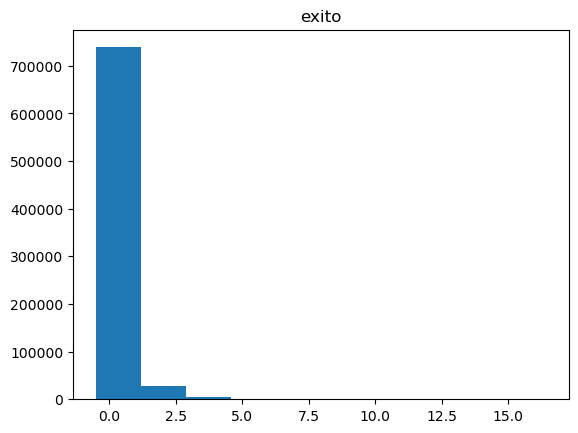

In [391]:
import matplotlib.pyplot as plt

plt.hist(X_norm_df_exito_2['exito'])
plt.title('exito')
plt.show()
plt.close()

In [392]:
df = X_norm_df_exito_2.copy() 
df['bins'] = pd.cut(X_norm_df_exito_2['exito'], bins=10)

# Contamos cuántos valores caen en cada bin
tabla_distribucion = df['bins'].value_counts().sort_index()

# Mostramos la tabla de distribución
print(tabla_distribucion)

bins
(-0.53, 1.183]      738663
(1.183, 2.878]       28405
(2.878, 4.573]        5284
(4.573, 6.269]        1606
(6.269, 7.964]         558
(7.964, 9.66]          179
(9.66, 11.355]          43
(11.355, 13.05]         15
(13.05, 14.746]          4
(14.746, 16.441]         2
Name: count, dtype: int64


Se puede observar que la cantidad de valores son muy dispares entre intervalos. Se procede a convertir dicha variable en categórica clasificando cada videojuego en una categoría de éxito (con valores discretos entre 0 y 9). Por tanto, la variable "exito" solamente podrá tener los siguientes valores: 0, 1, 2, 3, 4, 5, 6, 7, 8, o 9. Cuanto más bajo sea el número, menos éxito tiene el juego y viceversa. Los intervalos son los siguientes: min_exito - 1, -0.5, 0, 0.5, 1, 2, 4, 6, 8, 10, max_exito + 1. Se ha decidido esa separación ya que existen juegos muy exitosos a partir del valor 10. Se ha de matizar que en este estudio no se especifica si un videojuego tiene éxito o no si tiene, por ejemplo, un valor 3 en la variable "exito", si no que solamente servirá como guía para estimar el éxito que tendrá un videojuego comparándolo con otro juego que tenga un valor igual en la variable "exito" (se volverá a explicar más adelante): 

In [393]:
# Definir los intervalos personalizados
bins = [min_playtime - 1, -0.5, 0, 0.5, 1, 2, 4, 6, 8, 10, max_playtime + 1]  # Los límites de los intervalos
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  # Etiquetas para cada intervalo

X_norm_df_exito_2['exito'] = pd.cut(X_norm_df_exito_2['exito'], bins=bins, labels=labels, include_lowest=True) 

# Contar la cantidad de elementos en cada grupo
counts = X_norm_df_exito_2['exito'].value_counts().sort_index()

# Imprimir la cantidad de elementos en cada grupo
print(counts)

exito
0      1200
1      7236
2     17931
3    695539
4     38136
5     11359
6      2396
7       729
8       185
9        48
Name: count, dtype: int64


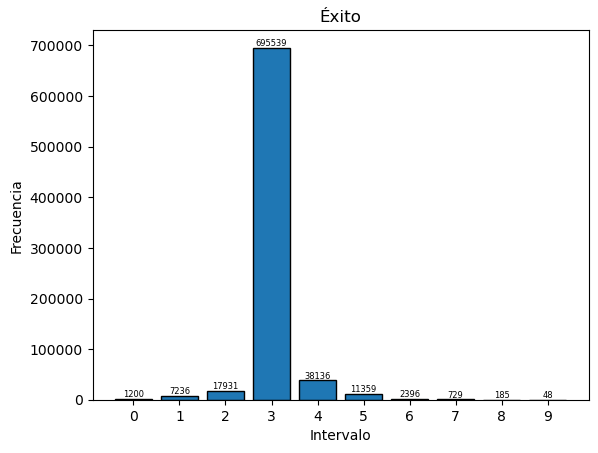

In [394]:
counts = X_norm_df_exito_2['exito'].value_counts().sort_index()

plt.bar(counts.index.astype(str), counts.values, edgecolor='black')

# Se añaden los valores encima de cada barra con un tamaño de fuente más pequeño
for index, value in enumerate(counts.values):
    plt.text(index, value, f'{value}', ha='center', va='bottom', fontsize=6)

plt.title('Éxito')
plt.xlabel('Intervalo')
plt.ylabel('Frecuencia')
plt.show()
plt.close()

In [395]:
# Valor mínimo de la columna 'playtime'
min_playtime = X_norm_df_exito_2['exito'].min()
print("Valor mínimo de 'exito':", min_playtime)

# Valor máximo de la columna 'playtime'
max_playtime = X_norm_df_exito_2['exito'].max()
print("Valor máximo de 'exito':", max_playtime)

Valor mínimo de 'exito': 0
Valor máximo de 'exito': 9


Se eliminan las columnas cuyos nombres acaban  en "at_dia" y "at_mes", ya que pueden influir negativamente en el entrenaiento de los modelos: 

In [396]:
# Filtrar las columnas que no terminan en '_dia'
columns_to_keep = [col for col in X_norm_df_exito_2.columns if not col.endswith('at_dia') and not col.endswith('at_mes') and not col.endswith('at_año') and not col.endswith('at_estacion')]

# Crear un nuevo DataFrame solo con las columnas seleccionadas
X_norm_df_exito_2 = X_norm_df_exito_2[columns_to_keep]

num_columns = X_norm_df_exito_2.shape[1]

print("Número de columnas:", num_columns)
columnas = list(X_norm_df_exito_2.columns)
print("Columnas restantes: ", columnas)

Número de columnas: 45
Columnas restantes:  ['id', 'slug', '3do_parent', 'android_parent', 'atari_parent', 'commodore-amiga_parent', 'ios_parent', 'linux_parent', 'mac_parent', 'neo-geo_parent', 'nintendo_parent', 'pc_parent', 'playstation_parent', 'sega_parent', 'web_parent', 'xbox_parent', 'action', 'adventure', 'arcade', 'board-games', 'card', 'casual', 'educational', 'family', 'fighting', 'indie', 'massively-multiplayer', 'platformer', 'puzzle', 'racing', 'role-playing-games-rpg', 'shooter', 'simulation', 'sports', 'strategy', 'released_año', 'released_mes', 'released_dia', 'released_trimestre', 'released_cuatrimestre', 'released_semestre', 'released_lustro', 'released_decada', 'released_estacion', 'exito']


No se eliminarán anomalías de los datos ya que los modelos obtienen buenos resultados sin eliminarlas. Sin embargo, aunque los modelos dan resultados muy similares si se aplica PCA como si no, en este caso sí se aplicará para disminuir el tiempo de ejecución, el cual se reduce significativamente. 

In [397]:
#from sklearn.ensemble import IsolationForest
#
## Creamos el modelo
#model = IsolationForest(random_state=40, contamination = 0.1)
#
## Ajustamos el modelo con las variables numéricas que nos interesan
#model.fit(X_norm_df_exito_2.drop(['id', 'slug'], axis = 1))
#
#data_outliers = X_norm_df_exito_2.copy()
#
#data_outliers['score_anomaly'] = model.decision_function(X_norm_df_exito_2.drop(['id', 'slug'], axis = 1))
#data_outliers['anomaly'] = model.predict(X_norm_df_exito_2.drop(['id', 'slug'], axis = 1))
#
## Los registros que tengan una valor de -1 en la columna "anomaly" proporcionada por el modelo de Insolation Forest son los registros que se han clasificado como outliers
#anomalies_exito = data_outliers[data_outliers.anomaly == -1]
#non_anomalies_exito = data_outliers[data_outliers.anomaly != -1]
#
#print('Número de anomalías: %d' % anomalies_exito.shape[0])
#print('Número de no anomalías: %d' % non_anomalies_exito.shape[0])

Primeramente se dividen los datos en datos de entrenamiento y de test (se cogen un 30% de los datos como datos de test): 

In [398]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, confusion_matrix, mean_absolute_error, r2_score, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import BaggingClassifier

non_anomalies_exito = X_norm_df_exito_2 

non_anomalies_exito_learn = non_anomalies_exito 
non_anomalies_exito_learn['target'] = non_anomalies_exito_learn.exito
non_anomalies_exito_learn = non_anomalies_exito_learn.drop('exito', axis = 1).drop(['id', 'slug'], axis = 1)

X = non_anomalies_exito_learn.drop(columns=['target'])  # Características (features)
Y = non_anomalies_exito_learn['target']                 # Variable objetivo (target)

#scaler = MinMaxScaler()
#Y = scaler.fit_transform(Y.values.reshape(-1, 1)).ravel()

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,                # Datos y objetivo
    test_size=0.3,       # Tamaño del conjunto de prueba (30%)
    random_state=54      # Semilla para la reproducibilidad
)

Se muestran los tamaños de los conjuntos de entrenamiento y test resultantes: 

In [399]:
print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")
print(f"Tamaño de y_train: {Y_train.shape}")
print(f"Tamaño de y_test: {Y_test.shape}")

Tamaño de X_train: (542331, 42)
Tamaño de X_test: (232428, 42)
Tamaño de y_train: (542331,)
Tamaño de y_test: (232428,)


Se muestra el gráfico del PCA y los valores de la varianza explicada en base al número de componentes que se apliquen con el PCA: 

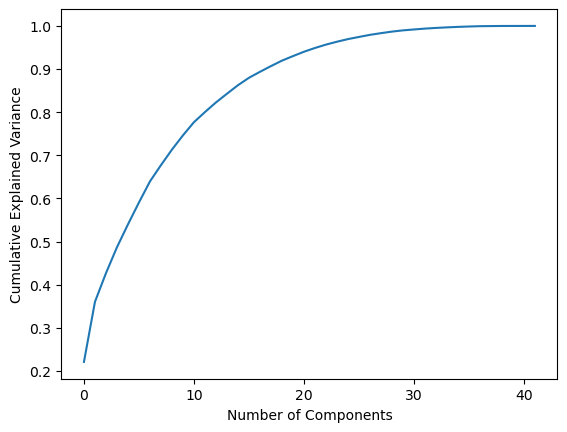

In [400]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [401]:
import numpy as np
from sklearn.decomposition import PCA

# Asumiendo que ya has escalado tus datos y creado el modelo PCA
pca = PCA().fit(X_train)

# Varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_

# Varianza acumulativa
cumulative_explained_variance = np.cumsum(explained_variance)

# Imprimir la varianza explicada por cada componente
print("Varianza explicada por cada componente principal:", explained_variance)

# Imprimir la varianza total explicada acumulada
print("Varianza acumulada total explicada:", cumulative_explained_variance)

# Encontrar el número de componentes que explican al menos el 90% de la varianza
n_components = np.argmax(cumulative_explained_variance >= 0.90) + 1
print("Número de componentes para explicar al menos el 90% de la varianza:", n_components)

Varianza explicada por cada componente principal: [0.2 0.1 0.1 0.1 0.1 0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0. ]
Varianza acumulada total explicada: [0.2 0.4 0.4 0.5 0.5 0.6 0.6 0.7 0.7 0.7 0.8 0.8 0.8 0.8 0.9 0.9 0.9 0.9
 0.9 0.9 0.9 0.9 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1. ]
Número de componentes para explicar al menos el 90% de la varianza: 18


Se reduce la dimensión de los datos a la dimensión indicada: 

In [402]:
pca = PCA(n_components=n_components)  # Seleccionamos 18 componentes
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

Se comprueba si las clases resultantes están desbalanceados: 

In [403]:
counts_y = Y_train.value_counts().sort_index()

# Imprimir la cantidad de elementos en cada clase
print(counts_y)

target
0       825
1      5104
2     12486
3    486939
4     26703
5      7889
6      1685
7       539
8       124
9        37
Name: count, dtype: int64


Como el total de valores de cada grupo de la variable "exito" están muy desbalanceados, se procede a utilizar la técnica de SMOTE (Synthetic Minority Over-sampling Technique), la cual genera nuevas muestras de las clases minoritarias para así abordar el desbalanceo entre las clases: 

In [404]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

smote = SMOTE()
X_res, Y_res = smote.fit_resample(X_train, Y_train)

# Contar la cantidad de elementos en cada clase de la variable objetivo
counts_smote = Y_res.value_counts().sort_index()

# Imprimir la cantidad de elementos en cada clase
print(counts_smote)

target
0    486939
1    486939
2    486939
3    486939
4    486939
5    486939
6    486939
7    486939
8    486939
9    486939
Name: count, dtype: int64


Puede verse que las clases se han balanceado correctamente y se han generado en total una cantidad bastante grande de registros. A continuación se reduce la cantidad de datos significativamente (10% de los mismos) para optimizar el tiempo de entrenamiento de los modelos. Se reduce es cantidad haciendo uso de train_test_split para así utilizar las variables resultantes como datos de entrenamiento y asegurar que siguen la misma distribución que las variables originales. Las variables que se usarán para validar los tests seguirán siendo X_test y Y_test para testear los modelos con datos reales: 

In [405]:
from sklearn.model_selection import train_test_split

X_res, X_res_remaining, Y_res, Y_res_remaining = train_test_split(
    X_res, Y_res, 
    test_size=0.9,  # Usa el 10% de los datos balanceados
    stratify=Y_res,  # Asegura que la distribución de clases se mantenga
    random_state=42  # Semilla para reproducibilidad
)

In [406]:
counts_y = Y_res.value_counts().sort_index()

# Imprimir la cantidad de elementos en cada clase
print(counts_y)

target
0    48694
1    48694
2    48694
3    48694
4    48694
5    48694
6    48693
7    48694
8    48694
9    48694
Name: count, dtype: int64


Puede verse cómo se han reducido los tamaños en cada clase. Por último, se aplican diferentes modelos de machine learning de clasificación y se muestran las métricas de recall, accuracy y f1 score tanto en train como en test. Matizar que se han evaluado los modelos con valores diferentes de los hiperparámetros en cada modelo para obtener los mejores resultados. Se aplican los modelos de regresión logística, k-vecinos más cercanos, perceptrón multicapa y árbol de decisión para clasificación: 

In [407]:
#Aplicamos el modelo de regresión logística al conjunto de datos de entrenamiento:
logreg = LogisticRegression(random_state=42, solver='lbfgs') #random_state=42, class_weight='balanced', solver='lbfgs', max_iter=200 
#solvers = lbfgs, (por defecto),newton-cg, liblinear y saga  

logreg.fit(X_res, Y_res)
preds_videogames_lr_train = logreg.predict(X_res).round()
preds_videogames_lr_test = logreg.predict(X_test).round()

#Valoramos el modelo resultante en el conjunto de test y calculamos la tasa de acierto:
recall_videogames_lr_train = recall_score(Y_res, preds_videogames_lr_train, average='weighted')
recall_videogames_lr_test = recall_score(Y_test, preds_videogames_lr_test, average='weighted')
accuracy_train = accuracy_score(Y_res, preds_videogames_lr_train)
accuracy_test = accuracy_score(Y_test, preds_videogames_lr_test)
f1_videogames_lr_train = f1_score(Y_res, preds_videogames_lr_train, average='weighted')
f1_videogames_lr_test = f1_score(Y_test, preds_videogames_lr_test, average='weighted')
conf_matrix_train = confusion_matrix(Y_res, preds_videogames_lr_train)
conf_matrix_test = confusion_matrix(Y_test, preds_videogames_lr_test)

print('Recall_lr en train: ', recall_videogames_lr_train)
print('Recall_error_lr en test: ', recall_videogames_lr_test)
print('Accuracy en train: ', accuracy_train)
print('Accuracy en test: ', accuracy_test)
print('F1_score_lr en train: ', f1_videogames_lr_train)
print('F1_score_lr en test: ', f1_videogames_lr_test)
#print('Matriz de Confusión en train:\n', conf_matrix_train)
#print('Matriz de Confusión en test:\n', conf_matrix_test)

Recall_lr en train:  0.4478815621669244
Recall_error_lr en test:  0.6209492832188893
Accuracy en train:  0.4478815621669244
Accuracy en test:  0.6209492832188893
F1_score_lr en train:  0.44382055644643054
F1_score_lr en test:  0.7190301413112642


In [408]:
from sklearn.neighbors import KNeighborsClassifier

#Aplicamos el modelo de k-vecinos más cercanos al conjunto de datos de entrenamiento
knn = KNeighborsClassifier(n_neighbors = 45) #distance n_neighbors = 5, weights = 'uniform' # weights='distance', n_neighbors=10, metric='manhattan' 
knn.fit(X_res, Y_res)
#Aumenta las distancias en los neigbors para disminuir el sobreajuste (por defecto son 5) 

#Realizamos predicciones en los conjuntos de entrenamiento y prueba
preds_videogames_kn_train = knn.predict(X_res)
preds_videogames_kn_test = knn.predict(X_test)

#Valoramos el modelo resultante en el conjunto de test y calculamos la tasa de acierto:
recall_videogames_kn_train = recall_score(Y_res, preds_videogames_kn_train, average='weighted')
recall_videogames_kn_test = recall_score(Y_test, preds_videogames_kn_test, average='weighted')
accuracy_train = accuracy_score(Y_res, preds_videogames_kn_train)
accuracy_test = accuracy_score(Y_test, preds_videogames_kn_test)
f1_videogames_kn_train = f1_score(Y_res, preds_videogames_kn_train, average='weighted')
f1_videogames_kn_test = f1_score(Y_test, preds_videogames_kn_test, average='weighted')
conf_matrix_train = confusion_matrix(Y_res, preds_videogames_kn_train)
conf_matrix_test = confusion_matrix(Y_test, preds_videogames_kn_test)

print('Recall_lr en train: ', recall_videogames_kn_train)
print('Recall_error_lr en test: ', recall_videogames_kn_test)
print('Accuracy en train: ', accuracy_train)
print('Accuracy en test: ', accuracy_test)
print('F1_score_lr en train: ', f1_videogames_kn_train)
print('F1_score_lr en test: ', f1_videogames_kn_test)
#print('Matriz de Confusión en train:\n', conf_matrix_train)
#print('Matriz de Confusión en test:\n', conf_matrix_test)

Recall_lr en train:  0.7795309063352904
Recall_error_lr en test:  0.6780809541019154
Accuracy en train:  0.7795309063352904
Accuracy en test:  0.6780809541019154
F1_score_lr en train:  0.7721963676038547
F1_score_lr en test:  0.7589802232660348


In [409]:
from sklearn.neural_network import MLPClassifier

#Aplicamos el modelo de perceptrón multicapa al conjunto de datos de entrenamiento:
mlp = MLPClassifier() #'identity', 'logistic', 'tanh' #random_state = 42, max_iter=500, hidden_layer_sizes='(50, 30)', activation='relu', learning_rate_init='0.001'
mlp.fit(X_res, Y_res)

#Valoramos el modelo resultante en el conjunto de test y calculamos la tasa de acierto:
preds_videogames_mlp_train = mlp.predict(X_res)
preds_videogames_mlp_test = mlp.predict(X_test)

#Valoramos el modelo resultante en el conjunto de test y calculamos la tasa de acierto:
recall_videogames_mlp_train = recall_score(Y_res, preds_videogames_mlp_train, average='weighted')
recall_videogames_mlp_test = recall_score(Y_test, preds_videogames_mlp_test, average='weighted')
accuracy_train = accuracy_score(Y_res, preds_videogames_mlp_train)
accuracy_test = accuracy_score(Y_test, preds_videogames_mlp_test)
f1_videogames_mlp_train = f1_score(Y_res, preds_videogames_mlp_train, average='weighted')
f1_videogames_mlp_test = f1_score(Y_test, preds_videogames_mlp_test, average='weighted')
conf_matrix_train = confusion_matrix(Y_res, preds_videogames_mlp_train)
conf_matrix_test = confusion_matrix(Y_test, preds_videogames_mlp_test)

print('Recall_lr en train: ', recall_videogames_mlp_train)
print('Recall_error_lr en test: ', recall_videogames_mlp_test)
print('Accuracy en train: ', accuracy_train)
print('Accuracy en test: ', accuracy_test)
print('F1_score_lr en train: ', f1_videogames_mlp_train)
print('F1_score_lr en test: ', f1_videogames_mlp_test)
#print('Matriz de Confusión en train:\n', conf_matrix_train)
#print('Matriz de Confusión en test:\n', conf_matrix_test)

Recall_lr en train:  0.7152333249133875
Recall_error_lr en test:  0.757662587984236
Accuracy en train:  0.7152333249133875
Accuracy en test:  0.757662587984236
F1_score_lr en train:  0.7110722369239821
F1_score_lr en test:  0.8127878512006698


In [410]:
from sklearn.tree import DecisionTreeClassifier

#Aplicamos el modelo de árbol de decisión al conjunto de datos de entrenamiento:
tree_reg = DecisionTreeClassifier(max_depth=17, min_samples_split=2, min_samples_leaf=1) #random_state = 42, max_depth='None', min_samples_split=2, min_samples_leaf=1, max_leaf_nodes='None' 

tree_reg.fit(X_res, Y_res) 

#Valoramos el modelo resultante en el conjunto de test y calculamos la tasa de acierto:
preds_videogames_dtc_train = tree_reg.predict(X_res) 
preds_videogames_dtc_test = tree_reg.predict(X_test) 

#Valoramos el modelo resultante en el conjunto de test y calculamos la tasa de acierto:
recall_videogames_dtc_train = recall_score(Y_res, preds_videogames_dtc_train, average='weighted')
recall_videogames_dtc_test = recall_score(Y_test, preds_videogames_dtc_test, average='weighted')
accuracy_train = accuracy_score(Y_res, preds_videogames_dtc_train)
accuracy_test = accuracy_score(Y_test, preds_videogames_dtc_test)
f1_videogames_dtc_train = f1_score(Y_res, preds_videogames_dtc_train, average='weighted')
f1_videogames_dtc_test = f1_score(Y_test, preds_videogames_dtc_test, average='weighted')
conf_matrix_train = confusion_matrix(Y_res, preds_videogames_dtc_train)
conf_matrix_test = confusion_matrix(Y_test, preds_videogames_dtc_test)

print('Recall_lr en train: ', recall_videogames_dtc_train)
print('Recall_error_lr en test: ', recall_videogames_dtc_test)
print('Accuracy en train: ', accuracy_train)
print('Accuracy en test: ', accuracy_test)
print('F1_score_lr en train: ', f1_videogames_dtc_train)
print('F1_score_lr en test: ', f1_videogames_dtc_test)

Recall_lr en train:  0.8065671470143078
Recall_error_lr en test:  0.7310392895864526
Accuracy en train:  0.8065671470143078
Accuracy en test:  0.7310392895864526
F1_score_lr en train:  0.8045452998622765
F1_score_lr en test:  0.7943217096719285


Se observa que el modelo con los mejores resultados es el modelo de árbol de decisión. 

Para optimizar dicho modelo, se aplica validación cruzada para calcular la media y la varianza entre los modelos obtenidos por dicha técnica: 

In [411]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Definir el modelo
tree_reg = DecisionTreeClassifier(max_depth=16, min_samples_split=2, min_samples_leaf=1)

# Aplicar validación cruzada con 5 folds 
scores = cross_val_score(tree_reg, X_res, Y_res, cv=10, scoring='f1_weighted')

# Evaluar la media y la desviación estándar de los scores obtenidos
print("Scores en cada fold:", scores)
print("Media del score:", scores.mean())
print("Desviación estándar del score:", scores.std())

Scores en cada fold: [0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7]
Media del score: 0.7352103399609995
Desviación estándar del score: 0.0019439629129775584


Para finalizar, se aplica bagging al modelo de árbol de decisión para mejorar la precisión y la estabilidad del modelo: 

In [412]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, accuracy_score, f1_score, confusion_matrix

# Crear el clasificador base (árbol de decisión)
base_tree = DecisionTreeClassifier(max_depth=16, min_samples_split=2, min_samples_leaf=1)

# Aplicar Bagging con el clasificador base
bagging_dtc = BaggingClassifier(
    estimator=base_tree,         # Modelo base (árbol de decisión)
    n_estimators=10,             # Número de árboles (modelos)
    max_samples=0.9,             # Tamaño de muestra para cada modelo (proporción o cantidad absoluta)
    max_features=1.0,            # Número de características a considerar en cada modelo
    bootstrap=True,              # Si se utiliza sampling con reemplazo
    bootstrap_features=False,    # Si se hace bootstraping en las características
    random_state=42              # Semilla para reproducibilidad
)

# Entrenar el modelo de Bagging en el conjunto de datos de entrenamiento
bagging_dtc.fit(X_res, Y_res)

# Predecir en el conjunto de entrenamiento y de prueba
preds_videogames_dtc_train_bagging = bagging_dtc.predict(X_res)
preds_videogames_dtc_test_bagging = bagging_dtc.predict(X_test)

# Evaluar el modelo
recall_videogames_dtc_train_bagging = recall_score(Y_res, preds_videogames_dtc_train_bagging, average='weighted')
recall_videogames_dtc_test_bagging = recall_score(Y_test, preds_videogames_dtc_test_bagging, average='weighted')
accuracy_train_bagging = accuracy_score(Y_res, preds_videogames_dtc_train_bagging)
accuracy_test_bagging = accuracy_score(Y_test, preds_videogames_dtc_test_bagging)
f1_videogames_dtc_train_bagging = f1_score(Y_res, preds_videogames_dtc_train_bagging, average='weighted')
f1_videogames_dtc_test_bagging = f1_score(Y_test, preds_videogames_dtc_test_bagging, average='weighted')
conf_matrix_train_bagging = confusion_matrix(Y_res, preds_videogames_dtc_train_bagging)
conf_matrix_test_bagging = confusion_matrix(Y_test, preds_videogames_dtc_test_bagging)

# Imprimir los resultados
print('Recall en train: ', recall_videogames_dtc_train_bagging)
print('Recall en test: ', recall_videogames_dtc_test_bagging)
print('Accuracy en train: ', accuracy_train_bagging)
print('Accuracy en test: ', accuracy_test_bagging)
print('F1_score en train: ', f1_videogames_dtc_train_bagging)
print('F1_score en test: ', f1_videogames_dtc_test_bagging)

Recall en train:  0.8246166357593046
Recall en test:  0.7628728036209063
Accuracy en train:  0.8246166357593046
Accuracy en test:  0.7628728036209063
F1_score en train:  0.8221519108907909
F1_score en test:  0.8164521404156477


Para finalizar, se muestra el error absoluto medio del proceso bagging resultante. las curvas ROC en cada clase y el area bajo las mismas y las matrices de confusión de entrenamiento y tests. También se muestran dichas matrices mostrando el porcentaje del número de registros clasificados en cada posición de la matriz con respecto al total de la clase a la que corresponde: 

In [416]:
from sklearn.metrics import mean_absolute_error
tree_reg = bagging_dtc
preds_videogames_dtc_test_bagging_to_mean = preds_videogames_dtc_test_bagging

mae = mean_absolute_error(Y_test, preds_videogames_dtc_test_bagging_to_mean)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.34853804188824067


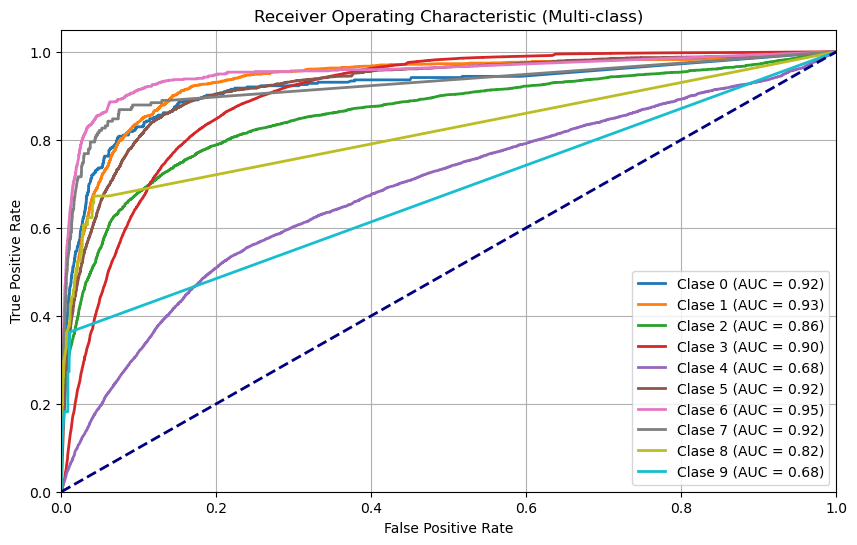

Área bajo la curva ROC (AUC) para la clase 0: 0.92
Área bajo la curva ROC (AUC) para la clase 1: 0.93
Área bajo la curva ROC (AUC) para la clase 2: 0.86
Área bajo la curva ROC (AUC) para la clase 3: 0.90
Área bajo la curva ROC (AUC) para la clase 4: 0.68
Área bajo la curva ROC (AUC) para la clase 5: 0.92
Área bajo la curva ROC (AUC) para la clase 6: 0.95
Área bajo la curva ROC (AUC) para la clase 7: 0.92
Área bajo la curva ROC (AUC) para la clase 8: 0.82
Área bajo la curva ROC (AUC) para la clase 9: 0.68


In [417]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Asegúrate de binarizar las etiquetas para el caso multiclase
y_test_bin = label_binarize(Y_test, classes=np.unique(Y_test))
y_probs_bin = bagging_dtc.predict_proba(X_test)

# Calcular la curva ROC y AUC para cada clase
fpr = {}
tpr = {}
roc_auc = {}
for i in range(y_test_bin.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_probs_bin[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_probs_bin[:, i])

# Visualizar la curva ROC
plt.figure(figsize=(10, 6))
for i in range(y_test_bin.shape[1]):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Clase {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Multi-class)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Imprimir el AUC para cada clase
for i in range(y_test_bin.shape[1]):
    print(f'Área bajo la curva ROC (AUC) para la clase {i}: {roc_auc[i]:.2f}')

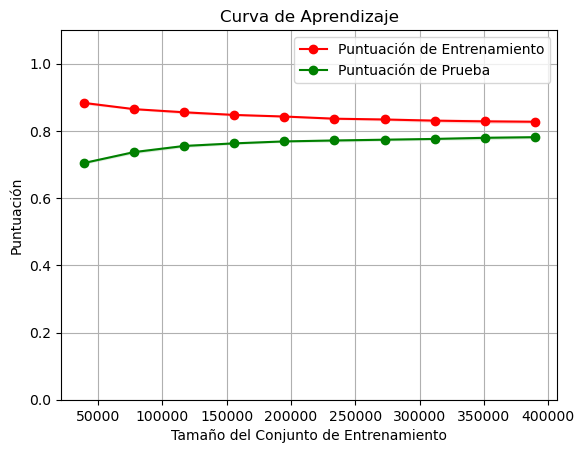

In [418]:
from sklearn.model_selection import learning_curve

# Calcular la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    bagging_dtc, X_res, Y_res, 
    train_sizes=np.linspace(0.1, 1.0, 10), 
    cv=5, n_jobs=-1, scoring='f1_weighted'
)

# Calcular la media y la desviación estándar de las puntuaciones de entrenamiento y prueba
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure()
plt.title("Curva de Aprendizaje")
plt.xlabel("Tamaño del Conjunto de Entrenamiento")
plt.ylabel("Puntuación")
plt.ylim(0, 1.1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, 
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, 
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Puntuación de Entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Puntuación de Prueba")

plt.legend(loc="best")
plt.show()

In [419]:
print('Matriz de Confusión en train:\n', conf_matrix_train_bagging)
print('Matriz de Confusión en test:\n', conf_matrix_test_bagging)

Matriz de Confusión en train:
 [[42731  3970  1399   103    93   213    60     5    78    42]
 [ 3810 39037  3503   420   685   884   150    42    63   100]
 [ 3254  8530 28377  2969  3814  1319   221    33    50   127]
 [  169   854   650 41316  4881   349    55    24    48   348]
 [  924  2814  1607  7347 30758  4157   481   144   128   334]
 [  984  2673  1207   572  2676 37147  2044   583   294   514]
 [  296   254    99    10   111   647 44644   925   923   784]
 [   50    28     4     0     3    45   541 45719   735  1569]
 [    1     3     0     0     0     0    39   246 43657  4748]
 [    0     0     0     0     0     0     0   541     1 48152]]
Matriz de Confusión en test:
 [[   139     92     82     14     18     21      6      2      0      1]
 [   206   1202    399     80     92    123     18      6      4      2]
 [   467   1164   2226    669    602    241     41     14      9     12]
 [   912   4353   4554 167171  27445   2007    336    130    214   1478]
 [   215    698 

In [420]:
# Convertir la matriz de confusión a porcentajes sobre el total de cada clase
conf_matrix_percent_per_class_train = conf_matrix_train_bagging.astype(float) / conf_matrix_train_bagging.sum(axis=1)[:, np.newaxis] * 100
conf_matrix_percent_per_class_test = conf_matrix_test_bagging.astype(float) / conf_matrix_test_bagging.sum(axis=1)[:, np.newaxis] * 100

# Ajustar la configuración para mostrar dos decimales 
np.set_printoptions(precision=1, suppress=True)

# Mostrar la matriz de confusión en porcentaje
print("Matriz de Confusión en Porcentajes (Sobre el Total de Cada Clase):")
print(conf_matrix_percent_per_class_train)
print(conf_matrix_percent_per_class_test)

Matriz de Confusión en Porcentajes (Sobre el Total de Cada Clase):
[[87.8  8.2  2.9  0.2  0.2  0.4  0.1  0.   0.2  0.1]
 [ 7.8 80.2  7.2  0.9  1.4  1.8  0.3  0.1  0.1  0.2]
 [ 6.7 17.5 58.3  6.1  7.8  2.7  0.5  0.1  0.1  0.3]
 [ 0.3  1.8  1.3 84.8 10.   0.7  0.1  0.   0.1  0.7]
 [ 1.9  5.8  3.3 15.1 63.2  8.5  1.   0.3  0.3  0.7]
 [ 2.   5.5  2.5  1.2  5.5 76.3  4.2  1.2  0.6  1.1]
 [ 0.6  0.5  0.2  0.   0.2  1.3 91.7  1.9  1.9  1.6]
 [ 0.1  0.1  0.   0.   0.   0.1  1.1 93.9  1.5  3.2]
 [ 0.   0.   0.   0.   0.   0.   0.1  0.5 89.7  9.8]
 [ 0.   0.   0.   0.   0.   0.   0.   1.1  0.  98.9]]
[[37.1 24.5 21.9  3.7  4.8  5.6  1.6  0.5  0.   0.3]
 [ 9.7 56.4 18.7  3.8  4.3  5.8  0.8  0.3  0.2  0.1]
 [ 8.6 21.4 40.9 12.3 11.1  4.4  0.8  0.3  0.2  0.2]
 [ 0.4  2.1  2.2 80.1 13.2  1.   0.2  0.1  0.1  0.7]
 [ 1.9  6.1  5.4 26.6 40.3 16.1  2.1  0.6  0.3  0.6]
 [ 2.5  6.7  4.1  4.2 18.7 45.7 13.5  2.6  0.9  1. ]
 [ 0.6  0.8  1.5  0.8  4.1 27.7 44.9 12.2  4.8  2.5]
 [ 0.5  0.   0.   0.5  2.1 20. 

Para finalizar el análisis, se muestra la cantidad de registros bien y mal clasficados y diferencias entre la clase predicha y la clase real: 

In [421]:
import numpy as np
import pandas as pd

Y_test_new = Y_test.copy() 
# Asumimos que PCA ha transformado X_test a ndarray
# Convertir Y_test_new y preds_videogames_dtc_test_bagging en Series si no lo son
if not isinstance(Y_test_new, pd.Series):
    Y_test_new = pd.Series(Y_test_new)

if not isinstance(preds_videogames_dtc_test_bagging, pd.Series):
    preds_videogames_dtc_test_bagging = pd.Series(preds_videogames_dtc_test_bagging)

# Asegurarse de que los índices coincidan
if not Y_test_new.index.equals(preds_videogames_dtc_test_bagging.index):
    Y_test_new = Y_test_new.reindex(preds_videogames_dtc_test_bagging.index)
    preds_videogames_dtc_test_bagging = preds_videogames_dtc_test_bagging.reindex(Y_test_new.index)

# Crear una máscara booleana para resultados correctos
correct_predictions = preds_videogames_dtc_test_bagging == Y_test_new

# Crear una máscara booleana para resultados incorrectos
incorrect_predictions = ~correct_predictions

# Obtener los índices de las instancias correctas e incorrectas
correct_indices = np.where(correct_predictions)[0]
incorrect_indices = np.where(incorrect_predictions)[0]

# Extraer los datos de test correctos e incorrectos usando numpy array indexing
X_test_correct = X_test[correct_indices]
X_test_incorrect = X_test[incorrect_indices]

# Imprimir ejemplos de instancias correctas e incorrectas
print(f'Número de instancias correctas: {len(X_test_correct)}')
print(f'Número de instancias incorrectas: {len(X_test_incorrect)}')

# Identificar las instancias mal clasificadas
incorrect_predictions_df = X_test[incorrect_indices]
incorrect_labels = Y_test_new.iloc[incorrect_indices]
predicted_labels = preds_videogames_dtc_test_bagging.iloc[incorrect_indices]

# Crear un DataFrame para mostrar las instancias mal clasificadas
error_df = pd.DataFrame({
    'Predicted': predicted_labels,
    'Actual': incorrect_labels
})

# Eliminar filas con NaN en cualquiera de las columnas
error_df = error_df.dropna()

# Convertir las columnas 'Predicted' y 'Actual' a enteros si son de tipo categoría
error_df['Predicted'] = error_df['Predicted'].astype(int)
error_df['Actual'] = error_df['Actual'].astype(int)

# Mostrar el número de instancias con diferentes diferencias en predicción
for i in range(1, 10): 
    print('Diferencia de: ', i) 
    print(error_df[abs(error_df['Predicted'] - error_df['Actual']) == i].shape[0])

Número de instancias correctas: 41552
Número de instancias incorrectas: 190876
Diferencia de:  1
18359
Diferencia de:  2
6767
Diferencia de:  3
2046
Diferencia de:  4
528
Diferencia de:  5
240
Diferencia de:  6
404
Diferencia de:  7
28
Diferencia de:  8
11
Diferencia de:  9
3


Se guardan el proceso de normalización usado, el proceso PCA utilizado, el modelo resultante (baggind del árbol de decisión) y el dataframe con las clasifiones calculadas para así usarlos externamente si fuera necesario: 

In [422]:
import joblib

# Guarda el scaler
joblib.dump(sc, 'scaler.pkl')

# Guarda el PCA
joblib.dump(pca, 'pca.pkl')

# Guarda el modelo entrenado
joblib.dump(tree_reg, 'tree_reg.pkl')

# Guardar el DataFrame en un archivo CSV
X_norm_df_exito_2.to_csv('data_videogames_success.csv', index=False)

Para finalizar la comprobación del modelo resultante, se crea un nuevo registro de prueba para que sea estimado por el modelo: 

In [423]:
new_data_dic_2 = {
    '3do_parent': 0, # 0-1 
    'android_parent': 0, # 0-1 
    'atari_parent': 0, # 0-1 
    'commodore-amiga_parent': 0, # 0-1 
    'ios_parent': 0, # 0-1 
    'linux_parent': 0, # 0-1 
    'mac_parent': 1, # 0-1 
    'neo-geo_parent': 0, # 0-1 
    'nintendo_parent': 1, # 0-1 
    'pc_parent': 1, # 0-1 
    'playstation_parent': 1, # 0-1 
    'sega_parent': 0, # 0-1 
    'web_parent': 0, # 0-1 
    'xbox_parent': 1, # 0-1 
    'action': 1, # 0-1 # GENRES 
    'adventure': 1, # 0-1 
    'arcade': 0, # 0-1 
    'board-games': 0, # 0-1 
    'card': 0, # 0-1 
    'casual': 0, # 0-1 
    'educational': 0, # 0-1 
    'family': 0, # 0-1 
    'fighting': 1, # 0-1 
    'indie': 0, # 0-1 
    'massively-multiplayer': 1, # 0-1 
    'platformer': 0, # 0-1 
    'puzzle': 0, # 0-1 
    'racing': 0, # 0-1 
    'role-playing-games-rpg': 1, # 0-1 
    'shooter': 0, # 0-1 
    'simulation': 0, # 0-1 
    'sports': 0, # 0-1 
    'strategy': 0, # 0-1 
    'released': '20-03-2024' 
}


Se crean ciertas funciones para convertir dicho registro en la entrada esperada del proceso de normalización sc, pca y el modelo utilizado y se aplican las mismas para así calcular la estimación del éxito del registro dado: 

In [424]:
pd.set_option('display.max_colwidth', None)
warnings.filterwarnings('ignore')

def dic_dates(mi_dict): 
    from datetime import datetime
    
    fecha = datetime.strptime(mi_dict['released'], '%d-%m-%Y')
    
    dia = fecha.day
    mes = fecha.month
    año = fecha.year
    
    # Calcular el trimestre, cuatrimestre, semestre, lustro, década y estación
    trimestre = (mes - 1) // 4 + 1
    cuatrimestre = (mes - 1) // 4 + 1
    semestre = mes // 7 + 1
    lustro = año // 5 * 5 
    decada = año // 10 * 10 
    
    primavera_inicio = pd.Timestamp(f'{año}-03-21')
    primavera_fin = pd.Timestamp(f'{año}-06-20')
    verano_inicio = pd.Timestamp(f'{año}-06-21')
    verano_fin = pd.Timestamp(f'{año}-09-22')
    otoño_inicio = pd.Timestamp(f'{año}-09-23')
    otoño_fin = pd.Timestamp(f'{año}-12-20')
    
    if primavera_inicio <= fecha <= primavera_fin:
        estacion = '1' #Spring 
    elif verano_inicio <= fecha <= verano_fin:
        estacion = '2' #Summer 
    elif otoño_inicio <= fecha <= otoño_fin:
        estacion = '3' #Autumn 
    else:
        estacion = '4' #Winter 
    
    # Agregar los nuevos valores al diccionario
    mi_dict['released_año'] = año
    mi_dict['released_mes'] = mes
    mi_dict['released_dia'] = dia
    mi_dict['released_trimestre'] = trimestre
    mi_dict['released_cuatrimestre'] = cuatrimestre
    mi_dict['released_semestre'] = semestre
    mi_dict['released_lustro'] = lustro
    mi_dict['released_decada'] = decada
    mi_dict['released_estacion'] = estacion
    
    # Eliminar la clave original 'released'
    del mi_dict['released']
    
    # Mostrar el resultado final
    return mi_dict 

def prediction(new_data_dic_ini, sc, pca, tree_reg): 
    
    order_list = ['id', 'slug', 'rating', 'reviews_text_count', 'added', 'playtime', 'suggestions_count', 'reviews_count', 'exceptional', 'meh', 'recommended', 'skip', 'exceptional_percent', 'meh_percent', 'recommended_percent', 'skip_percent', 'beaten', 'dropped', 'owned', 'playing', 'toplay', 'yet', 'apple-appstore', 'epic-games', 'gog', 'google-play', 'itch', 'nintendo', 'playstation-store', 'steam', 'xbox-store', 'xbox360', '3do_parent', 'android_parent', 'atari_parent', 'commodore-amiga_parent', 'ios_parent', 'linux_parent', 'mac_parent', 'neo-geo_parent', 'nintendo_parent', 'pc_parent', 'playstation_parent', 'sega_parent', 'web_parent', 'xbox_parent', 'action', 'adventure', 'arcade', 'board-games', 'card', 'casual', 'educational', 'family', 'fighting', 'indie', 'massively-multiplayer', 'platformer', 'puzzle', 'racing', 'role-playing-games-rpg', 'shooter', 'simulation', 'sports', 'strategy', 'released_año', 'released_mes', 'released_dia', 'released_trimestre', 'released_cuatrimestre', 'released_semestre', 'released_lustro', 'released_decada', 'released_estacion', '3do_released_at_mes', '3do_released_at_estacion', 'android_released_at_mes', 'android_released_at_estacion', 'apple-ii_released_at_mes', 'apple-ii_released_at_estacion', 'atari-2600_released_at_mes', 'atari-2600_released_at_estacion', 'atari-5200_released_at_mes', 'atari-5200_released_at_estacion', 'atari-7800_released_at_mes', 'atari-7800_released_at_estacion', 'atari-8-bit_released_at_mes', 'atari-8-bit_released_at_estacion', 'atari-flashback_released_at_mes', 'atari-flashback_released_at_estacion', 'atari-lynx_released_at_mes', 'atari-lynx_released_at_estacion', 'atari-st_released_at_mes', 'atari-st_released_at_estacion', 'atari-xegs_released_at_mes', 'atari-xegs_released_at_estacion', 'commodore-amiga_released_at_mes', 'commodore-amiga_released_at_estacion', 'dreamcast_released_at_mes', 'dreamcast_released_at_estacion', 'game-boy_released_at_mes', 'game-boy_released_at_estacion', 'game-boy-advance_released_at_mes', 'game-boy-advance_released_at_estacion', 'game-boy-color_released_at_mes', 'game-boy-color_released_at_estacion', 'game-gear_released_at_mes', 'game-gear_released_at_estacion', 'gamecube_released_at_mes', 'gamecube_released_at_estacion', 'genesis_released_at_mes', 'genesis_released_at_estacion', 'ios_released_at_mes', 'ios_released_at_estacion', 'jaguar_released_at_mes', 'jaguar_released_at_estacion', 'linux_released_at_mes', 'linux_released_at_estacion', 'macintosh_released_at_mes', 'macintosh_released_at_estacion', 'macos_released_at_mes', 'macos_released_at_estacion', 'neogeo_released_at_mes', 'neogeo_released_at_estacion', 'nes_released_at_mes', 'nes_released_at_estacion', 'nintendo-3ds_released_at_mes', 'nintendo-3ds_released_at_estacion', 'nintendo-64_released_at_mes', 'nintendo-64_released_at_estacion', 'nintendo-ds_released_at_mes', 'nintendo-ds_released_at_estacion', 'nintendo-dsi_released_at_mes', 'nintendo-dsi_released_at_estacion', 'nintendo-switch_released_at_mes', 'nintendo-switch_released_at_estacion', 'pc_released_at_mes', 'pc_released_at_estacion', 'playstation1_released_at_mes', 'playstation1_released_at_estacion', 'playstation2_released_at_mes', 'playstation2_released_at_estacion', 'playstation3_released_at_mes', 'playstation3_released_at_estacion', 'playstation4_released_at_mes', 'playstation4_released_at_estacion', 'playstation5_released_at_mes', 'playstation5_released_at_estacion', 'ps-vita_released_at_mes', 'ps-vita_released_at_estacion', 'psp_released_at_mes', 'psp_released_at_estacion', 'sega-32x_released_at_mes', 'sega-32x_released_at_estacion', 'sega-cd_released_at_mes', 'sega-cd_released_at_estacion', 'sega-master-system_released_at_mes', 'sega-master-system_released_at_estacion', 'sega-saturn_released_at_mes', 'sega-saturn_released_at_estacion', 'snes_released_at_mes', 'snes_released_at_estacion', 'web_released_at_mes', 'web_released_at_estacion', 'wii_released_at_mes', 'wii_released_at_estacion', 'wii-u_released_at_mes', 'wii-u_released_at_estacion', 'xbox-old_released_at_mes', 'xbox-old_released_at_estacion', 'xbox-one_released_at_mes', 'xbox-one_released_at_estacion', 'xbox-series-x_released_at_mes', 'xbox-series-x_released_at_estacion', 'xbox360_released_at_mes', 'xbox360_released_at_estacion', 'exito']
    order_list_2 = ['rating', 'reviews_text_count', 'added', 'playtime', 'suggestions_count', 'reviews_count', 'exceptional', 'meh', 'recommended', 'skip', 'exceptional_percent', 'meh_percent', 'recommended_percent', 'skip_percent', 'beaten', 'dropped', 'owned', 'playing', 'toplay', 'yet', 'apple-appstore', 'epic-games', 'gog', 'google-play', 'itch', 'nintendo', 'playstation-store', 'steam', 'xbox-store', 'xbox360', '3do_parent', 'android_parent', 'atari_parent', 'commodore-amiga_parent', 'ios_parent', 'linux_parent', 'mac_parent', 'neo-geo_parent', 'nintendo_parent', 'pc_parent', 'playstation_parent', 'sega_parent', 'web_parent', 'xbox_parent', 'action', 'adventure', 'arcade', 'board-games', 'card', 'casual', 'educational', 'family', 'fighting', 'indie', 'massively-multiplayer', 'platformer', 'puzzle', 'racing', 'role-playing-games-rpg', 'shooter', 'simulation', 'sports', 'strategy', 'released_año', 'released_mes', 'released_dia', 'released_trimestre', 'released_cuatrimestre', 'released_semestre', 'released_lustro', 'released_decada', 'released_estacion', '3do_released_at_mes', '3do_released_at_estacion', 'android_released_at_mes', 'android_released_at_estacion', 'apple-ii_released_at_mes', 'apple-ii_released_at_estacion', 'atari-2600_released_at_mes', 'atari-2600_released_at_estacion', 'atari-5200_released_at_mes', 'atari-5200_released_at_estacion', 'atari-7800_released_at_mes', 'atari-7800_released_at_estacion', 'atari-8-bit_released_at_mes', 'atari-8-bit_released_at_estacion', 'atari-flashback_released_at_mes', 'atari-flashback_released_at_estacion', 'atari-lynx_released_at_mes', 'atari-lynx_released_at_estacion', 'atari-st_released_at_mes', 'atari-st_released_at_estacion', 'atari-xegs_released_at_mes', 'atari-xegs_released_at_estacion', 'commodore-amiga_released_at_mes', 'commodore-amiga_released_at_estacion', 'dreamcast_released_at_mes', 'dreamcast_released_at_estacion', 'game-boy_released_at_mes', 'game-boy_released_at_estacion', 'game-boy-advance_released_at_mes', 'game-boy-advance_released_at_estacion', 'game-boy-color_released_at_mes', 'game-boy-color_released_at_estacion', 'game-gear_released_at_mes', 'game-gear_released_at_estacion', 'gamecube_released_at_mes', 'gamecube_released_at_estacion', 'genesis_released_at_mes', 'genesis_released_at_estacion', 'ios_released_at_mes', 'ios_released_at_estacion', 'jaguar_released_at_mes', 'jaguar_released_at_estacion', 'linux_released_at_mes', 'linux_released_at_estacion', 'macintosh_released_at_mes', 'macintosh_released_at_estacion', 'macos_released_at_mes', 'macos_released_at_estacion', 'neogeo_released_at_mes', 'neogeo_released_at_estacion', 'nes_released_at_mes', 'nes_released_at_estacion', 'nintendo-3ds_released_at_mes', 'nintendo-3ds_released_at_estacion', 'nintendo-64_released_at_mes', 'nintendo-64_released_at_estacion', 'nintendo-ds_released_at_mes', 'nintendo-ds_released_at_estacion', 'nintendo-dsi_released_at_mes', 'nintendo-dsi_released_at_estacion', 'nintendo-switch_released_at_mes', 'nintendo-switch_released_at_estacion', 'pc_released_at_mes', 'pc_released_at_estacion', 'playstation1_released_at_mes', 'playstation1_released_at_estacion', 'playstation2_released_at_mes', 'playstation2_released_at_estacion', 'playstation3_released_at_mes', 'playstation3_released_at_estacion', 'playstation4_released_at_mes', 'playstation4_released_at_estacion', 'playstation5_released_at_mes', 'playstation5_released_at_estacion', 'ps-vita_released_at_mes', 'ps-vita_released_at_estacion', 'psp_released_at_mes', 'psp_released_at_estacion', 'sega-32x_released_at_mes', 'sega-32x_released_at_estacion', 'sega-cd_released_at_mes', 'sega-cd_released_at_estacion', 'sega-master-system_released_at_mes', 'sega-master-system_released_at_estacion', 'sega-saturn_released_at_mes', 'sega-saturn_released_at_estacion', 'snes_released_at_mes', 'snes_released_at_estacion', 'web_released_at_mes', 'web_released_at_estacion', 'wii_released_at_mes', 'wii_released_at_estacion', 'wii-u_released_at_mes', 'wii-u_released_at_estacion', 'xbox-old_released_at_mes', 'xbox-old_released_at_estacion', 'xbox-one_released_at_mes', 'xbox-one_released_at_estacion', 'xbox-series-x_released_at_mes', 'xbox-series-x_released_at_estacion', 'xbox360_released_at_mes', 'xbox360_released_at_estacion']
    variable_names = ['rating', 'reviews_text_count', 'added', 'playtime', 'suggestions_count', 'reviews_count', 'exceptional', 'meh', 'recommended', 'skip', 'exceptional_percent', 'meh_percent', 'recommended_percent', 'skip_percent', 'beaten', 'dropped', 'owned', 'playing', 'toplay', 'yet', 'apple-appstore', 'epic-games', 'gog', 'google-play', 'itch', 'nintendo', 'playstation-store', 'steam', 'xbox-store', 'xbox360', '3do_released_at_mes', '3do_released_at_estacion', 'android_released_at_mes', 'android_released_at_estacion', 'apple-ii_released_at_mes', 'apple-ii_released_at_estacion', 'atari-2600_released_at_mes', 'atari-2600_released_at_estacion', 'atari-5200_released_at_mes', 'atari-5200_released_at_estacion', 'atari-7800_released_at_mes', 'atari-7800_released_at_estacion', 'atari-8-bit_released_at_mes', 'atari-8-bit_released_at_estacion', 'atari-flashback_released_at_mes', 'atari-flashback_released_at_estacion', 'atari-lynx_released_at_mes', 'atari-lynx_released_at_estacion', 'atari-st_released_at_mes', 'atari-st_released_at_estacion', 'atari-xegs_released_at_mes', 'atari-xegs_released_at_estacion', 'commodore-amiga_released_at_mes', 'commodore-amiga_released_at_estacion', 'dreamcast_released_at_mes', 'dreamcast_released_at_estacion', 'game-boy_released_at_mes', 'game-boy_released_at_estacion', 'game-boy-advance_released_at_mes', 'game-boy-advance_released_at_estacion', 'game-boy-color_released_at_mes', 'game-boy-color_released_at_estacion', 'game-gear_released_at_mes', 'game-gear_released_at_estacion', 'gamecube_released_at_mes', 'gamecube_released_at_estacion', 'genesis_released_at_mes', 'genesis_released_at_estacion', 'ios_released_at_mes', 'ios_released_at_estacion', 'jaguar_released_at_mes', 'jaguar_released_at_estacion', 'linux_released_at_mes', 'linux_released_at_estacion', 'macintosh_released_at_mes', 'macintosh_released_at_estacion', 'macos_released_at_mes', 'macos_released_at_estacion', 'neogeo_released_at_mes', 'neogeo_released_at_estacion', 'nes_released_at_mes', 'nes_released_at_estacion', 'nintendo-3ds_released_at_mes', 'nintendo-3ds_released_at_estacion', 'nintendo-64_released_at_mes', 'nintendo-64_released_at_estacion', 'nintendo-ds_released_at_mes', 'nintendo-ds_released_at_estacion', 'nintendo-dsi_released_at_mes', 'nintendo-dsi_released_at_estacion', 'nintendo-switch_released_at_mes', 'nintendo-switch_released_at_estacion', 'pc_released_at_mes', 'pc_released_at_estacion', 'playstation1_released_at_mes', 'playstation1_released_at_estacion', 'playstation2_released_at_mes', 'playstation2_released_at_estacion', 'playstation3_released_at_mes', 'playstation3_released_at_estacion', 'playstation4_released_at_mes', 'playstation4_released_at_estacion', 'playstation5_released_at_mes', 'playstation5_released_at_estacion', 'ps-vita_released_at_mes', 'ps-vita_released_at_estacion', 'psp_released_at_mes', 'psp_released_at_estacion', 'sega-32x_released_at_mes', 'sega-32x_released_at_estacion', 'sega-cd_released_at_mes', 'sega-cd_released_at_estacion', 'sega-master-system_released_at_mes', 'sega-master-system_released_at_estacion', 'sega-saturn_released_at_mes', 'sega-saturn_released_at_estacion', 'snes_released_at_mes', 'snes_released_at_estacion', 'web_released_at_mes', 'web_released_at_estacion', 'wii_released_at_mes', 'wii_released_at_estacion', 'wii-u_released_at_mes', 'wii-u_released_at_estacion', 'xbox-old_released_at_mes', 'xbox-old_released_at_estacion', 'xbox-one_released_at_mes', 'xbox-one_released_at_estacion', 'xbox-series-x_released_at_mes', 'xbox-series-x_released_at_estacion', 'xbox360_released_at_mes', 'xbox360_released_at_estacion']
    
    new_data_dic = dic_dates(new_data_dic_ini) 
    
    # Añadir las nuevas variables al diccionario con valor 0 
    for var in variable_names:
        new_data_dic[var] = 0
    
    ordered_dict = {key: new_data_dic[key] for key in order_list if key in new_data_dic}
    
    # Convertir el diccionario a una lista
    new_data = list(ordered_dict.values())
    new_data_array = np.array(new_data).reshape(1, -1)
    
    # Se aplica la scala MixMax que se aplicó para el modelo 
    new_data_scaled = sc.transform(new_data_array)
    df = pd.DataFrame(new_data_scaled, columns=order_list_2)
    
    new_data_scaled_2 = df.drop(variable_names, axis=1)
    
    # Aplicar PCA al nuevo registro
    new_data_pca = pca.transform(new_data_scaled_2)
    
    # Hacer la predicción
    prediction = tree_reg.predict(new_data_pca) 
    
    return prediction 

prediction_data = prediction(new_data_dic_2, sc, pca, tree_reg)
print("\n") 
print("Prediction: ", prediction_data, "- Available values: 0, 1, 2, 3, 4, 5, 6, 7, 8 and 9 (ascending order based on success)") 
print("\n") 
print("The given videogame will have a success similar to the following ones (run again for more examples): ") 
print("\n") 
print(X_norm_df_exito_2[X_norm_df_exito_2['exito'] == prediction_data[0]]['slug'].sample(25)) 
print("\n") 



Prediction:  [8] - Available values: 0, 1, 2, 3, 4, 5, 6, 7, 8 and 9 (ascending order based on success)


The given videogame will have a success similar to the following ones (run again for more examples): 


25606     wolfenstein-2-the-new-colossus
21060                          syberia-2
43689                          bad-north
25577           kingdom-come-deliverance
211807                        hades-2018
844          wonder-boy-the-dragons-trap
3720                batman-arkham-asylum
2150                         psychonauts
50385                               gris
40535                       donut-county
3477                         lego-marvel
2503                          heavy-rain
4949                   fallout-new-vegas
8873                             figment
211814                  the-outer-worlds
1048                        world-of-goo
22            middle-earth-shadow-of-war
2569                           firewatch
3471       assassins-creed-iv-black-flag
12397    